# **Inferencia estadística**
# IE11. Cálculo de Poder para pruebas de 1 muestra


## <font color='blue'>__Bibliografía__</font>
* Applied Statistics and Probability for Engineers. Douglas C. Montgomery, George C. Runger, 2013.

* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.

* Things I have learned (so far) Am Psychol. Cohen J., 1990.

* Understanding The New Statistics (Multivariate Applications Series). Geoff Cumming , 2012.


## <font color='blue'>__Lecturas__</font>
* Sullivan GM, Feinn R. (2012). Using Effect Size-or Why the P Value Is Not Enough. J Grad Med Educ., 4(3):279-82. doi: 10.4300/JGME-D-12-00156.1 ***(leer ejemplo de Aspirina)***

* Steidl, R. J., Hayes, J. P., & Schauber, E. (1997). Statistical Power Analysis in Wildlife Research. The Journal of Wildlife Management, 61(2), 270–279. https://doi.org/10.2307/3802582


Recordemos de nuestro notebook anterior que una __Prueba de 1 muestra__ es una prueba de hipótesis estadística que se utiliza para establecer si la media poblacional (o proporción poblaciona), la cual desconocemos se está infiriendo a partir de una muestra, por lo tanto es desconocida, es diferente de un valor específico (target).

In [1]:
# Importamos librerías
import numpy as np #
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as tm

## <font color='blue'>__Poder estadístico (Power)__</font>



### <font color='blue'>**¿Qué es el poder estadístico o potencia de la prueba?**</font>

La potencia de una prueba estadística o el poder estadístico es la probabilidad de que la hipótesis alternativa ($H_1$) sea aceptada cuando la hipótesis alternativa ($H_1$) es verdadera, es decir, la probabilidad de no cometer un __error del tipo II__ .  En otras palabras es la probabilidad de que una investigación encuentre una diferencia estadísticamente significativa entre el grupo (la muestra) y un paramétro o entre 2 grupos, cuando existe una diferencia real.


A medida que aumenta la potencia, las posibilidades de que se presente un error del tipo II disminuyen. La probabilidad de que ocurra un error de tipo II se conoce como la __tasa de falsos negativos ($\beta$)__. Por lo tanto la potencia será igual a $(1 - \beta)$. También se la conoce como la __sensibilidad__.


La potencia es $(1 - \beta)$, donde $\beta$ es la probabilidad de concluir que no existe efecto cuando realmente existe (falso negativo). Recordemos que a este error lo llamamos **Error de Tipo II**.

<img src='https://drive.google.com/uc?export=view&id=1CY4DmHcguIsyZ08CVF1WsbRjZNBzpF8P' width="100" align="center" style="margin-right: 20px">
<br>

>"Cuando finalmente me topé con el análisis de potencia (poder)... fue como si me hubiera muerto y me hubiera ido al cielo " - Jacob Cohen
Original: "When I finally stumbled onto power analysis... it was as if I had died and gone to heaven"

En estadística, un resultado o efecto es __estadísticamente significativo__ cuando es improbable que haya sido debido al azar.
Al igual que la significación estadística, la __potencia estadística__ depende del tamaño del efecto (medida de la fuerza de un fenómeno) y del tamaño de la muestra. Si el tamaño del efecto de la intervención es grande, será posible detectar dicho efecto con muestras más pequeñas, mientras que un tamaño de efecto más pequeño requeriría tamaños de muestra más grandes.  Por tanto, las muestras de tamaños enormes pueden detectar diferencias que son bastante pequeñas, pero posiblemente triviales. Para determinar que tan importante es la diferencia encontrada dependerá de criterios de relevancia asociados al campo de la investigación (industrial, clínico, científico, etc ).


<img src='https://drive.google.com/uc?export=view&id=1HKewKPPfArmjnz72ZF-omQWY_jI5mpRc' width="700" align="center" style="margin-right: 20px">
<br>


<p style="font-size:8pt">
Imagen gentileza de: Roberto Moraga</p>

### <font color='blue'> **Veamos un ejemplo**</font>
**Análisis post-hoc**

Imagenemos que trabajamos en una compañía que desarrolla un producto de marketing digital, y nuestra promesa de valor es ayudar a los clientes a incrementar el engagement con sus clientes. Para este fin pondremos en un prestigioso cliente nuestro producto estrella para mejorar el onboarding de nuevos clientes.

Para evaluar el engagement nuestro prestigioso cliente mide la cantidad de minutos que pasan al día sus clientes en su plataforma, actualmente el cliente (con su actual modelo de servicio) exhibe un tiempo de actividad diario promedio igual a 200 minutos, con una desviación estandar de 35 minutos.

Esta será nuestra hipotésis nula:
$$H_0: \quad \mu = 200 $$

Llevaremos a cabo un experimento para ver si nuestro producto estrella produce un engagement mejor que el actual exhibido por nuestro cliente.

El experimento fue ejecutado durante 2 semanas, y en este se midió el tiempo de actividad de 50 de sus clientes, arrojando un promedio de de 212 minutos, lo que significa que el producto generó un efecto de 12 minutos.

Con base en lo anterior procedemos a calcular el Poder estadístico en la siguiente prueba de hipótesis:

$$H_0: \quad \mu = 200 $$
$$H_1: \quad \mu =212$$

Vamos a presetear un valor $\alpha$ de 0.05 (error tipo I).


Z crítico:  1.64
Valor media para Z crítico:  208.14


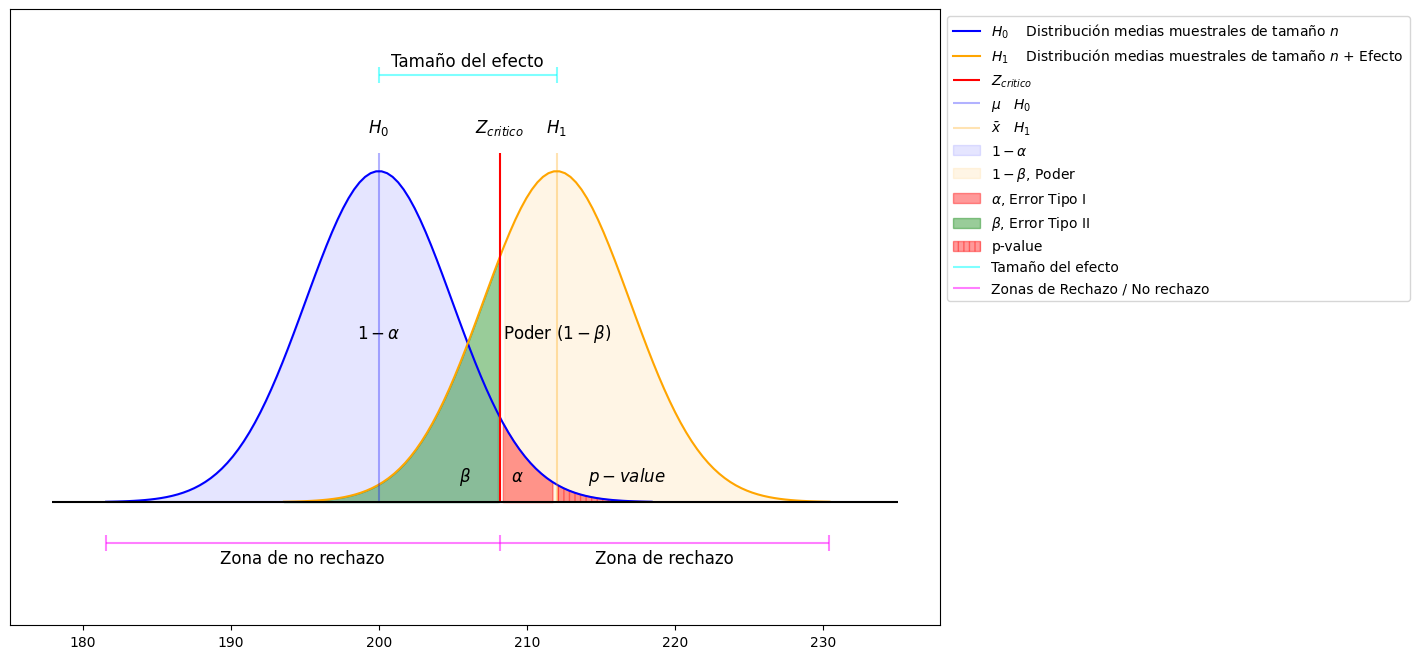

In [2]:
# Cargamos data línea base
Mu = 200
Sigma = 35

# Resltados del tratamiento
n = 50
x_bar = 212
# Tamaño del efecto
efecto = x_bar - Mu #12 minutos de diferencia

# 1) Definir hipótesis a contrastar (prueba unilateral - cola derecha)
alpha = 0.05

 # H0:   Mu = 200
 # H1:   Mu =  212


# 2) Buscar valor crítico de Z
Zcritico = stats.norm.ppf(1-alpha)# 1 cola
print(f'Z crítico: {Zcritico: 4.2f}')

# 3) Calcular el valor en minutos correspondiente al Z crítico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print(f"Valor media para Z crítico: {valor_minutos_zcritico: 4.2f}")
# Visualizando la distribución de las medias muestrales y límites

# Proyectar distribución H0
muestral_z = stats.norm(Mu, Sigma/np.sqrt(n))
x_z0 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z0 = muestral_z.pdf(x_z0) # función densidad probabilidad


# Proyectar distribución H1
muestral_z = stats.norm(x_bar, Sigma/np.sqrt(n))
x_z1 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z1 = muestral_z.pdf(x_z1) # función densidad probabilidad

# Ploteo de gráficos principales
plt.figure(figsize=(12, 8)) # tamaño gráfico
plt.plot(x_z0, pdf_z0, color='b', label='$H_0 \quad$ Distribución medias muestrales de tamaño $n$') # medias H0
plt.plot(x_z1, pdf_z1, color='orange', label='$H_1 \quad$ Distribución medias muestrales de tamaño $n$ + Efecto') # medias H1

# Ploteo de líneas verticales
plt.vlines(ymin=0, ymax=0.085, x=valor_minutos_zcritico,  colors='r', label='$Z_{critico}$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=Mu,  colors='b', alpha=0.3, label='$\mu \quad H_0$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=x_bar,  colors='orange', alpha=0.3, label=r'$\bar{x} \quad H_1$', zorder=9)
plt.ylim(-0.03, 0.12)
plt.yticks([])

# Ploteo de línea horizontal
plt.hlines(xmin=min(x_z0)*0.98, xmax=max(x_z1)*1.02, y=0,  colors='k', alpha=1, zorder=10)

# Relleno (fill) de áreas
# Fill de 1 - alfa
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 < valor_minutos_zcritico),
                 color='b', alpha=0.1, label=r'$1-\alpha$')
# Fill de 1 - beta (Potencia)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 > valor_minutos_zcritico),
                 color='orange', alpha=0.1, label=r'$1 - \beta$, Poder')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > valor_minutos_zcritico) & (x_z0 <= x_bar),
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 < valor_minutos_zcritico),
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
# Fill de p-value
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > x_bar),
                 color='r', hatch='|||', alpha=0.4, label=r'p-value')

# Textos y anotaciones
plt.text(Mu, 0.04, r'$1-\alpha$', fontsize=12, ha='center')
plt.text((Mu + ((valor_minutos_zcritico-Mu)*2/3)), 0.005, r'$\beta$', fontsize=12)
plt.text((valor_minutos_zcritico + ((x_bar-valor_minutos_zcritico)/5)), 0.005, r'$\alpha$', fontsize=12)
plt.text(x_bar*1.01, 0.005, r'$p-value$', fontsize=12)
plt.text(x_bar, 0.04, r'Poder $(1-\beta)$', fontsize=12, ha='center')
plt.text(Mu, 0.09, r'$H_0$', fontsize=12, ha='center')
plt.text(valor_minutos_zcritico, 0.09, r'$Z_{critico}$', fontsize=12, ha='center')
plt.text(x_bar, 0.09, r'$H_1$', fontsize=12, ha='center')

# Tamaño del efecto
plt.hlines(xmin=Mu, xmax=x_bar, y=0.104,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
plt.vlines(ymin=0.102, ymax=0.106, x=Mu,  colors='cyan', alpha=0.5)
plt.vlines(ymin=0.102, ymax=0.106, x=x_bar,  colors='cyan', alpha=0.5)
plt.text((Mu + (x_bar-Mu)/2), 0.106, r'Tamaño del efecto', fontsize=12, ha='center')

# Zonas de rechazo y no rechazo
plt.hlines(xmin=min(x_z0), xmax=max(x_z1), y=-0.01,  colors='magenta', alpha=0.5, label='Zonas de Rechazo / No rechazo')
plt.vlines(ymin=-0.008, ymax=-0.012, x=min(x_z0),  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=valor_minutos_zcritico,  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=max(x_z1),  colors='magenta', alpha=0.5)
plt.text((min(x_z0) + ((valor_minutos_zcritico-min(x_z0))/2)), -0.015, r'Zona de no rechazo', fontsize=12, ha='center')
plt.text((valor_minutos_zcritico + ((max(x_z1)-valor_minutos_zcritico)/2)), -0.015, r'Zona de rechazo', fontsize=12, ha='center')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [3]:
#Calculo del Poder
#En este caso es la probabilidad de tomar medias muestrales mayores a 208.14,
#en una distribución de medias muestrales de tamaño 50 con media de 212 y sigma de 35/raiz(50)

Poder = stats.norm(x_bar, Sigma/np.sqrt(n)).sf(valor_minutos_zcritico)
print(f'Poder de la prueba: {Poder: 4.2f}')


Poder de la prueba:  0.78


# <font color='purple'> __EXPERIMENTO__: </font>
### Cómo el tamaño del efecto influye en el poder de un experimento

Hacemos este experimento para ver cómo cambia la probabilidad de detectar una diferencia real (poder estadístico) según qué tan grande sea el efecto del producto en el tiempo de uso de la app. Esto nos ayuda a entender mejor cuándo un experimento puede darnos resultados confiables.

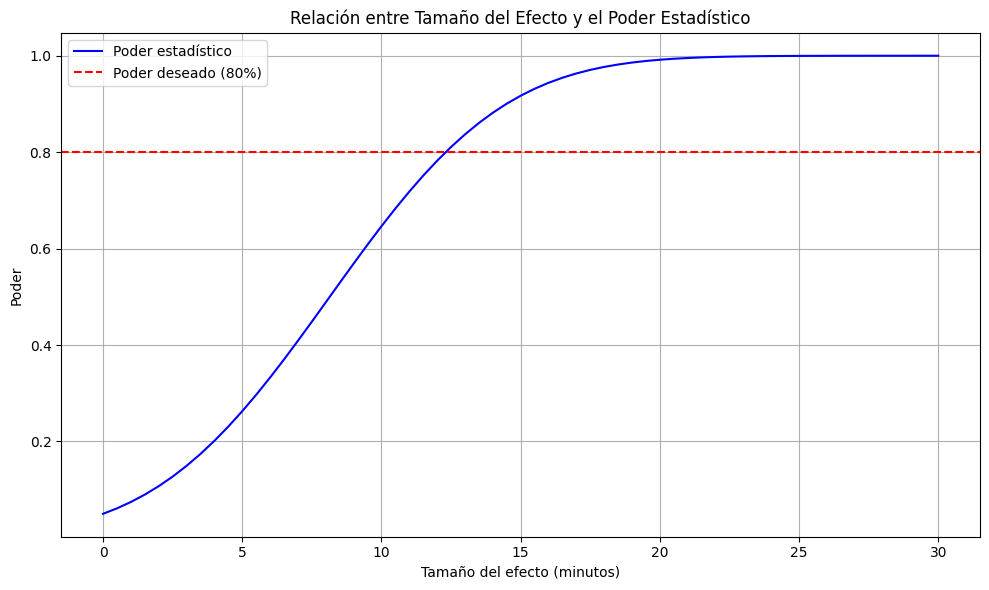

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros base
mu_0 = 200        # Media bajo H0
sigma = 35        # Desviación estándar
n = 50            # Tamaño muestral
alpha = 0.05      # Nivel de significancia

# Valores de efecto a evaluar (mu1 - mu0)
efectos = np.arange(0, 30.5, 0.5)  # de 0 a 30 minutos de efecto
poderes = []

# Z crítico (cola derecha)
z_critico = norm.ppf(1 - alpha)
limite_rechazo = mu_0 + z_critico * (sigma / np.sqrt(n))

# Calcular poder para cada efecto
for efecto in efectos:
    mu_1 = mu_0 + efecto
    distribucion_h1 = norm(loc=mu_1, scale=sigma / np.sqrt(n))
    poder = distribucion_h1.sf(limite_rechazo)  # P(X > límite | H1)
    poderes.append(poder)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(efectos, poderes, label='Poder estadístico', color='blue')
plt.axhline(0.8, linestyle='--', color='red', label='Poder deseado (80%)')
plt.title('Relación entre Tamaño del Efecto y el Poder Estadístico')
plt.xlabel('Tamaño del efecto (minutos)')
plt.ylabel('Poder')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Al realizar el experimento, observamos que a medida que el tamaño del efecto aumenta, también lo hace el poder estadístico. El gráfico muestra que se necesita un tamaño de efecto cercano a 13 minutos para alcanzar el poder deseado del 80%

### <font color='purple'>Fin experimento </font>

# <font color='red'>__LINK DE INTERÉS__: </font>

1. Más información sobre el tamaño del efecto en : [LINK](https://www.scielo.org.mx/scielo.php?pid=S2448-91902021000200128&script=sci_arttext)


### <font color='green'>Actividad 1</font>
A partir del código anterior, modifique los valores del mismo: $\mu$, $n$, $\bar{x}$, $\alpha$, $\beta$, _tamaño del efecto_, etc., de forma tal que se visualice:
1. un aumento de la potencia producto del aumento del tamaño muestral.
2. un $\text{p-value} < \alpha$ que permita rechazar una $H_0$, pero una mala potencia
3. un $\text{p-value} > \alpha$
4. un tamaño de efecto insignificante
5. una $H_0$ no rechazada
6. un $\alpha = 0.1$

Reflexione sobre las cambios cambios en las zonas del gráfico, los errores Tipo I y II, etc.

Z crítico:  1.64
Valor media para Z crítico:  205.76


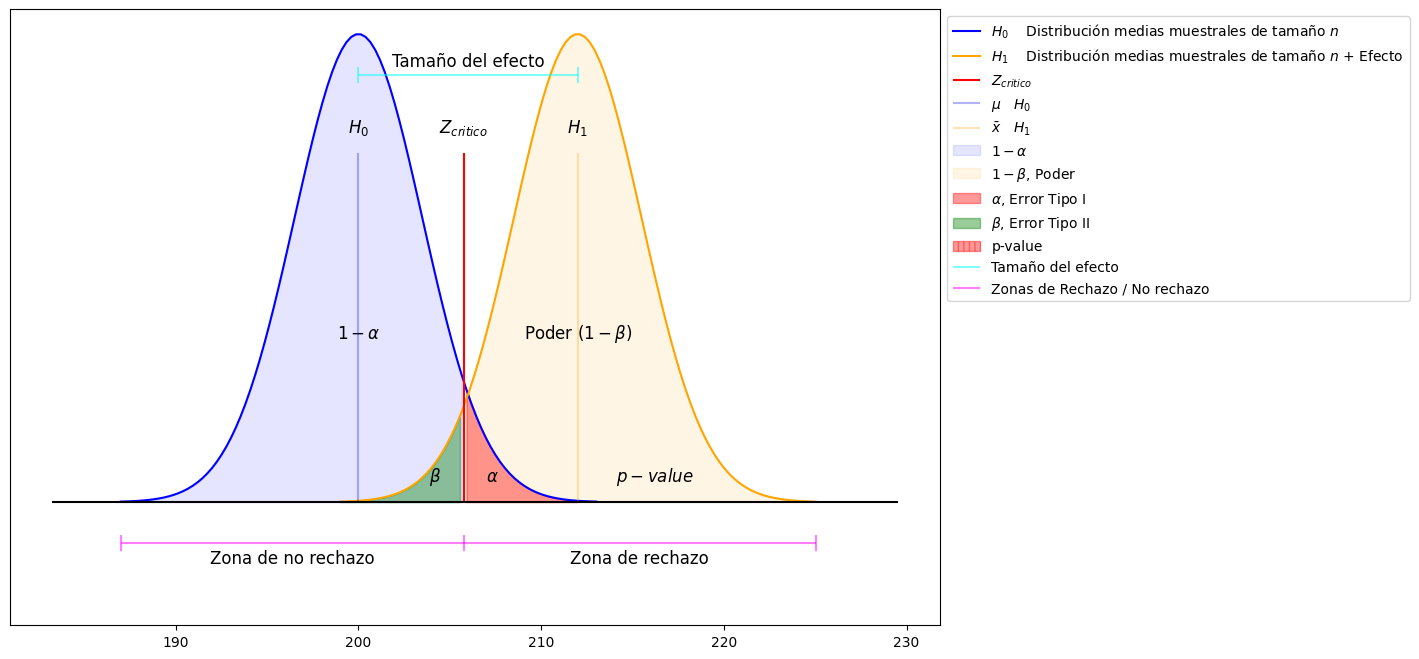

Poder de la prueba:  0.96


In [ ]:
# Tu código aquí ...

#####################################################################
## 1. un aumento de la potencia producto del aumento del tamaño muestral
##  (aumentamos n=100)
#####################################################################

# Cargamos data línea base
Mu = 200
Sigma = 35

# Resltados del tratamiento
n = 100
x_bar = 212
# Tamaño del efecto
efecto = x_bar - Mu #12 minutos de diferencia

# 1) Definir hipótesis a contrastar (prueba unilateral - cola derecha)
alpha = 0.05

 # H0:   Mu = 200
 # H1:   Mu =  212


# 2) Buscar valor crítico de Z
Zcritico = stats.norm.ppf(1-alpha)# 1 cola
print(f'Z crítico: {Zcritico: 4.2f}')

# 3) Calcular el valor en minutos correspondiente al Z crítico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print(f"Valor media para Z crítico: {valor_minutos_zcritico: 4.2f}")
# Visualizando la distribución de las medias muestrales y límites

# Proyectar distribución H0
muestral_z = stats.norm(Mu, Sigma/np.sqrt(n))
x_z0 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z0 = muestral_z.pdf(x_z0) # función densidad probabilidad


# Proyectar distribución H1
muestral_z = stats.norm(x_bar, Sigma/np.sqrt(n))
x_z1 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z1 = muestral_z.pdf(x_z1) # función densidad probabilidad

# Ploteo de gráficos principales
plt.figure(figsize=(12, 8)) # tamaño gráfico
plt.plot(x_z0, pdf_z0, color='b', label='$H_0 \quad$ Distribución medias muestrales de tamaño $n$') # medias H0
plt.plot(x_z1, pdf_z1, color='orange', label='$H_1 \quad$ Distribución medias muestrales de tamaño $n$ + Efecto') # medias H1

# Ploteo de líneas verticales
plt.vlines(ymin=0, ymax=0.085, x=valor_minutos_zcritico,  colors='r', label='$Z_{critico}$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=Mu,  colors='b', alpha=0.3, label='$\mu \quad H_0$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=x_bar,  colors='orange', alpha=0.3, label=r'$\bar{x} \quad H_1$', zorder=9)
plt.ylim(-0.03, 0.12)
plt.yticks([])

# Ploteo de línea horizontal
plt.hlines(xmin=min(x_z0)*0.98, xmax=max(x_z1)*1.02, y=0,  colors='k', alpha=1, zorder=10)

# Relleno (fill) de áreas
# Fill de 1 - alfa
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 < valor_minutos_zcritico),
                 color='b', alpha=0.1, label=r'$1-\alpha$')
# Fill de 1 - beta (Potencia)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 > valor_minutos_zcritico),
                 color='orange', alpha=0.1, label=r'$1 - \beta$, Poder')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > valor_minutos_zcritico) & (x_z0 <= x_bar),
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 < valor_minutos_zcritico),
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
# Fill de p-value
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > x_bar),
                 color='r', hatch='|||', alpha=0.4, label=r'p-value')

# Textos y anotaciones
plt.text(Mu, 0.04, r'$1-\alpha$', fontsize=12, ha='center')
plt.text((Mu + ((valor_minutos_zcritico-Mu)*2/3)), 0.005, r'$\beta$', fontsize=12)
plt.text((valor_minutos_zcritico + ((x_bar-valor_minutos_zcritico)/5)), 0.005, r'$\alpha$', fontsize=12)
plt.text(x_bar*1.01, 0.005, r'$p-value$', fontsize=12)
plt.text(x_bar, 0.04, r'Poder $(1-\beta)$', fontsize=12, ha='center')
plt.text(Mu, 0.09, r'$H_0$', fontsize=12, ha='center')
plt.text(valor_minutos_zcritico, 0.09, r'$Z_{critico}$', fontsize=12, ha='center')
plt.text(x_bar, 0.09, r'$H_1$', fontsize=12, ha='center')

# Tamaño del efecto
plt.hlines(xmin=Mu, xmax=x_bar, y=0.104,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
plt.vlines(ymin=0.102, ymax=0.106, x=Mu,  colors='cyan', alpha=0.5)
plt.vlines(ymin=0.102, ymax=0.106, x=x_bar,  colors='cyan', alpha=0.5)
plt.text((Mu + (x_bar-Mu)/2), 0.106, r'Tamaño del efecto', fontsize=12, ha='center')

# Zonas de rechazo y no rechazo
plt.hlines(xmin=min(x_z0), xmax=max(x_z1), y=-0.01,  colors='magenta', alpha=0.5, label='Zonas de Rechazo / No rechazo')
plt.vlines(ymin=-0.008, ymax=-0.012, x=min(x_z0),  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=valor_minutos_zcritico,  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=max(x_z1),  colors='magenta', alpha=0.5)
plt.text((min(x_z0) + ((valor_minutos_zcritico-min(x_z0))/2)), -0.015, r'Zona de no rechazo', fontsize=12, ha='center')
plt.text((valor_minutos_zcritico + ((max(x_z1)-valor_minutos_zcritico)/2)), -0.015, r'Zona de rechazo', fontsize=12, ha='center')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
Poder = stats.norm(x_bar, Sigma/np.sqrt(n)).sf(valor_minutos_zcritico)
print(f'Poder de la prueba: {Poder: 4.2f}')

Z crítico:  1.64
Valor media para Z crítico:  211.51


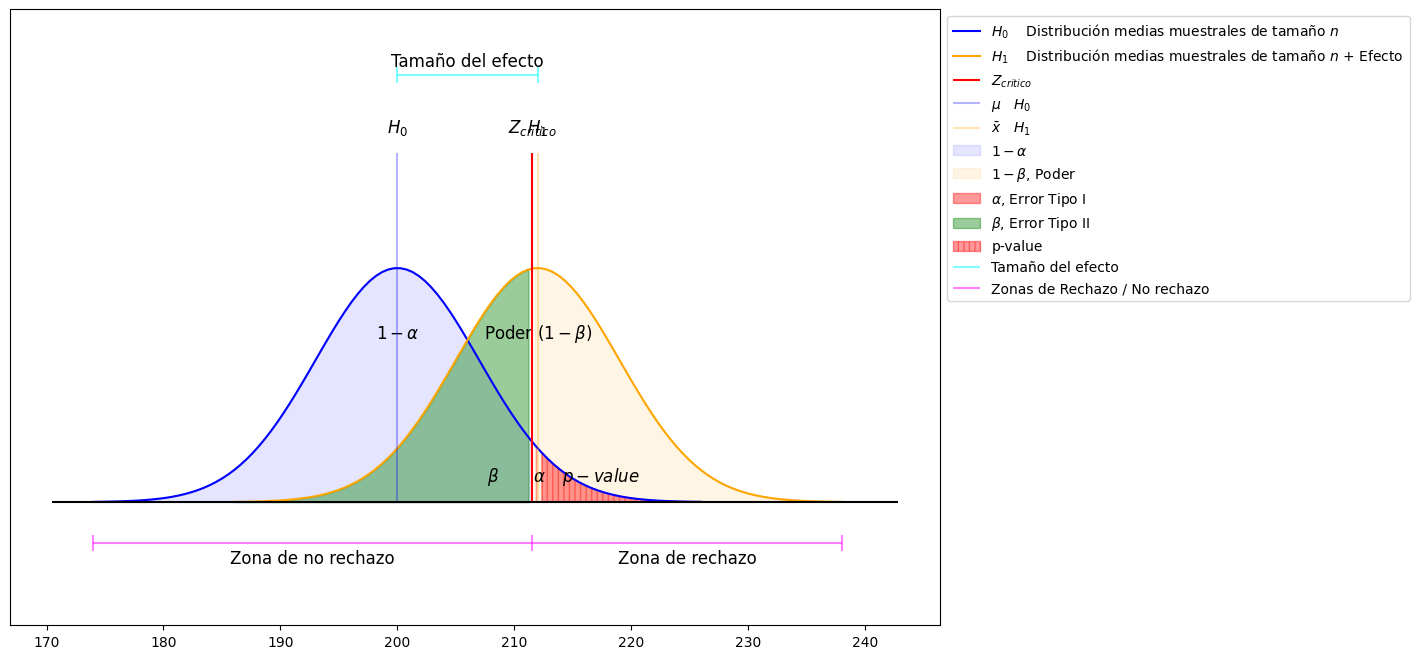

Poder de la prueba:  0.53


In [ ]:
#####################################################################
## 2. un  p-value<α  que permita rechazar una  H0 , pero una mala potencia
## Disminuimos el tamaño de la muestra para mantener p-value<α pero disminuir potencia
#####################################################################

# Cargamos data línea base
Mu = 200
Sigma = 35

# Resltados del tratamiento
n = 25
x_bar = 212
# Tamaño del efecto
efecto = x_bar - Mu #12 minutos de diferencia

# 1) Definir hipótesis a contrastar (prueba unilateral - cola derecha)
alpha = 0.05

 # H0:   Mu = 200
 # H1:   Mu =  212


# 2) Buscar valor crítico de Z
Zcritico = stats.norm.ppf(1-alpha)# 1 cola
print(f'Z crítico: {Zcritico: 4.2f}')

# 3) Calcular el valor en minutos correspondiente al Z crítico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print(f"Valor media para Z crítico: {valor_minutos_zcritico: 4.2f}")
# Visualizando la distribución de las medias muestrales y límites

# Proyectar distribución H0
muestral_z = stats.norm(Mu, Sigma/np.sqrt(n))
x_z0 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z0 = muestral_z.pdf(x_z0) # función densidad probabilidad


# Proyectar distribución H1
muestral_z = stats.norm(x_bar, Sigma/np.sqrt(n))
x_z1 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z1 = muestral_z.pdf(x_z1) # función densidad probabilidad

# Ploteo de gráficos principales
plt.figure(figsize=(12, 8)) # tamaño gráfico
plt.plot(x_z0, pdf_z0, color='b', label='$H_0 \quad$ Distribución medias muestrales de tamaño $n$') # medias H0
plt.plot(x_z1, pdf_z1, color='orange', label='$H_1 \quad$ Distribución medias muestrales de tamaño $n$ + Efecto') # medias H1

# Ploteo de líneas verticales
plt.vlines(ymin=0, ymax=0.085, x=valor_minutos_zcritico,  colors='r', label='$Z_{critico}$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=Mu,  colors='b', alpha=0.3, label='$\mu \quad H_0$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=x_bar,  colors='orange', alpha=0.3, label=r'$\bar{x} \quad H_1$', zorder=9)
plt.ylim(-0.03, 0.12)
plt.yticks([])

# Ploteo de línea horizontal
plt.hlines(xmin=min(x_z0)*0.98, xmax=max(x_z1)*1.02, y=0,  colors='k', alpha=1, zorder=10)

# Relleno (fill) de áreas
# Fill de 1 - alfa
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 < valor_minutos_zcritico),
                 color='b', alpha=0.1, label=r'$1-\alpha$')
# Fill de 1 - beta (Potencia)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 > valor_minutos_zcritico),
                 color='orange', alpha=0.1, label=r'$1 - \beta$, Poder')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > valor_minutos_zcritico) & (x_z0 <= x_bar),
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 < valor_minutos_zcritico),
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
# Fill de p-value
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > x_bar),
                 color='r', hatch='|||', alpha=0.4, label=r'p-value')

# Textos y anotaciones
plt.text(Mu, 0.04, r'$1-\alpha$', fontsize=12, ha='center')
plt.text((Mu + ((valor_minutos_zcritico-Mu)*2/3)), 0.005, r'$\beta$', fontsize=12)
plt.text((valor_minutos_zcritico + ((x_bar-valor_minutos_zcritico)/5)), 0.005, r'$\alpha$', fontsize=12)
plt.text(x_bar*1.01, 0.005, r'$p-value$', fontsize=12)
plt.text(x_bar, 0.04, r'Poder $(1-\beta)$', fontsize=12, ha='center')
plt.text(Mu, 0.09, r'$H_0$', fontsize=12, ha='center')
plt.text(valor_minutos_zcritico, 0.09, r'$Z_{critico}$', fontsize=12, ha='center')
plt.text(x_bar, 0.09, r'$H_1$', fontsize=12, ha='center')

# Tamaño del efecto
plt.hlines(xmin=Mu, xmax=x_bar, y=0.104,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
plt.vlines(ymin=0.102, ymax=0.106, x=Mu,  colors='cyan', alpha=0.5)
plt.vlines(ymin=0.102, ymax=0.106, x=x_bar,  colors='cyan', alpha=0.5)
plt.text((Mu + (x_bar-Mu)/2), 0.106, r'Tamaño del efecto', fontsize=12, ha='center')

# Zonas de rechazo y no rechazo
plt.hlines(xmin=min(x_z0), xmax=max(x_z1), y=-0.01,  colors='magenta', alpha=0.5, label='Zonas de Rechazo / No rechazo')
plt.vlines(ymin=-0.008, ymax=-0.012, x=min(x_z0),  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=valor_minutos_zcritico,  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=max(x_z1),  colors='magenta', alpha=0.5)
plt.text((min(x_z0) + ((valor_minutos_zcritico-min(x_z0))/2)), -0.015, r'Zona de no rechazo', fontsize=12, ha='center')
plt.text((valor_minutos_zcritico + ((max(x_z1)-valor_minutos_zcritico)/2)), -0.015, r'Zona de rechazo', fontsize=12, ha='center')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
Poder = stats.norm(x_bar, Sigma/np.sqrt(n)).sf(valor_minutos_zcritico)
print(f'Poder de la prueba: {Poder: 4.2f}')

Z crítico:  1.64
Valor media para Z crítico:  208.14


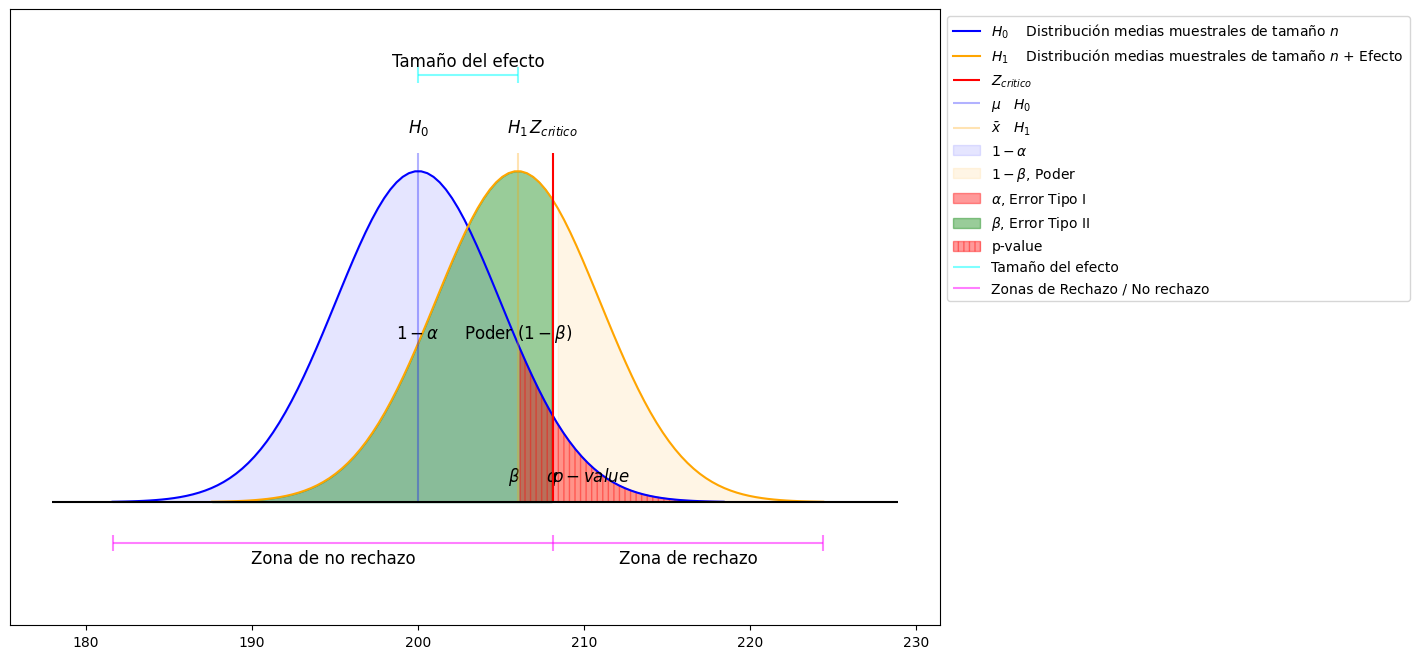

Poder de la prueba:  0.33


In [ ]:
#####################################################################
## 3. un  p-value>α
## Se disminuye el tamaño del efecto
#####################################################################

# Cargamos data línea base
Mu = 200
Sigma = 35

# Resltados del tratamiento
n = 50
x_bar = 206
# Tamaño del efecto
efecto = x_bar - Mu #12 minutos de diferencia

# 1) Definir hipótesis a contrastar (prueba unilateral - cola derecha)
alpha = 0.05

 # H0:   Mu = 200
 # H1:   Mu =  212


# 2) Buscar valor crítico de Z
Zcritico = stats.norm.ppf(1-alpha)# 1 cola
print(f'Z crítico: {Zcritico: 4.2f}')

# 3) Calcular el valor en minutos correspondiente al Z crítico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print(f"Valor media para Z crítico: {valor_minutos_zcritico: 4.2f}")
# Visualizando la distribución de las medias muestrales y límites

# Proyectar distribución H0
muestral_z = stats.norm(Mu, Sigma/np.sqrt(n))
x_z0 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z0 = muestral_z.pdf(x_z0) # función densidad probabilidad


# Proyectar distribución H1
muestral_z = stats.norm(x_bar, Sigma/np.sqrt(n))
x_z1 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z1 = muestral_z.pdf(x_z1) # función densidad probabilidad

# Ploteo de gráficos principales
plt.figure(figsize=(12, 8)) # tamaño gráfico
plt.plot(x_z0, pdf_z0, color='b', label='$H_0 \quad$ Distribución medias muestrales de tamaño $n$') # medias H0
plt.plot(x_z1, pdf_z1, color='orange', label='$H_1 \quad$ Distribución medias muestrales de tamaño $n$ + Efecto') # medias H1

# Ploteo de líneas verticales
plt.vlines(ymin=0, ymax=0.085, x=valor_minutos_zcritico,  colors='r', label='$Z_{critico}$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=Mu,  colors='b', alpha=0.3, label='$\mu \quad H_0$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=x_bar,  colors='orange', alpha=0.3, label=r'$\bar{x} \quad H_1$', zorder=9)
plt.ylim(-0.03, 0.12)
plt.yticks([])

# Ploteo de línea horizontal
plt.hlines(xmin=min(x_z0)*0.98, xmax=max(x_z1)*1.02, y=0,  colors='k', alpha=1, zorder=10)

# Relleno (fill) de áreas
# Fill de 1 - alfa
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 < valor_minutos_zcritico),
                 color='b', alpha=0.1, label=r'$1-\alpha$')
# Fill de 1 - beta (Potencia)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 > valor_minutos_zcritico),
                 color='orange', alpha=0.1, label=r'$1 - \beta$, Poder')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > valor_minutos_zcritico) & (x_z0 <= x_bar),
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 < valor_minutos_zcritico),
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
# Fill de p-value
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > x_bar),
                 color='r', hatch='|||', alpha=0.4, label=r'p-value')

# Textos y anotaciones
plt.text(Mu, 0.04, r'$1-\alpha$', fontsize=12, ha='center')
plt.text((Mu + ((valor_minutos_zcritico-Mu)*2/3)), 0.005, r'$\beta$', fontsize=12)
plt.text((valor_minutos_zcritico + ((x_bar-valor_minutos_zcritico)/5)), 0.005, r'$\alpha$', fontsize=12)
plt.text(x_bar*1.01, 0.005, r'$p-value$', fontsize=12)
plt.text(x_bar, 0.04, r'Poder $(1-\beta)$', fontsize=12, ha='center')
plt.text(Mu, 0.09, r'$H_0$', fontsize=12, ha='center')
plt.text(valor_minutos_zcritico, 0.09, r'$Z_{critico}$', fontsize=12, ha='center')
plt.text(x_bar, 0.09, r'$H_1$', fontsize=12, ha='center')

# Tamaño del efecto
plt.hlines(xmin=Mu, xmax=x_bar, y=0.104,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
plt.vlines(ymin=0.102, ymax=0.106, x=Mu,  colors='cyan', alpha=0.5)
plt.vlines(ymin=0.102, ymax=0.106, x=x_bar,  colors='cyan', alpha=0.5)
plt.text((Mu + (x_bar-Mu)/2), 0.106, r'Tamaño del efecto', fontsize=12, ha='center')

# Zonas de rechazo y no rechazo
plt.hlines(xmin=min(x_z0), xmax=max(x_z1), y=-0.01,  colors='magenta', alpha=0.5, label='Zonas de Rechazo / No rechazo')
plt.vlines(ymin=-0.008, ymax=-0.012, x=min(x_z0),  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=valor_minutos_zcritico,  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=max(x_z1),  colors='magenta', alpha=0.5)
plt.text((min(x_z0) + ((valor_minutos_zcritico-min(x_z0))/2)), -0.015, r'Zona de no rechazo', fontsize=12, ha='center')
plt.text((valor_minutos_zcritico + ((max(x_z1)-valor_minutos_zcritico)/2)), -0.015, r'Zona de rechazo', fontsize=12, ha='center')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
Poder = stats.norm(x_bar, Sigma/np.sqrt(n)).sf(valor_minutos_zcritico)
print(f'Poder de la prueba: {Poder: 4.2f}')

Z crítico:  1.64
Valor media para Z crítico:  208.14


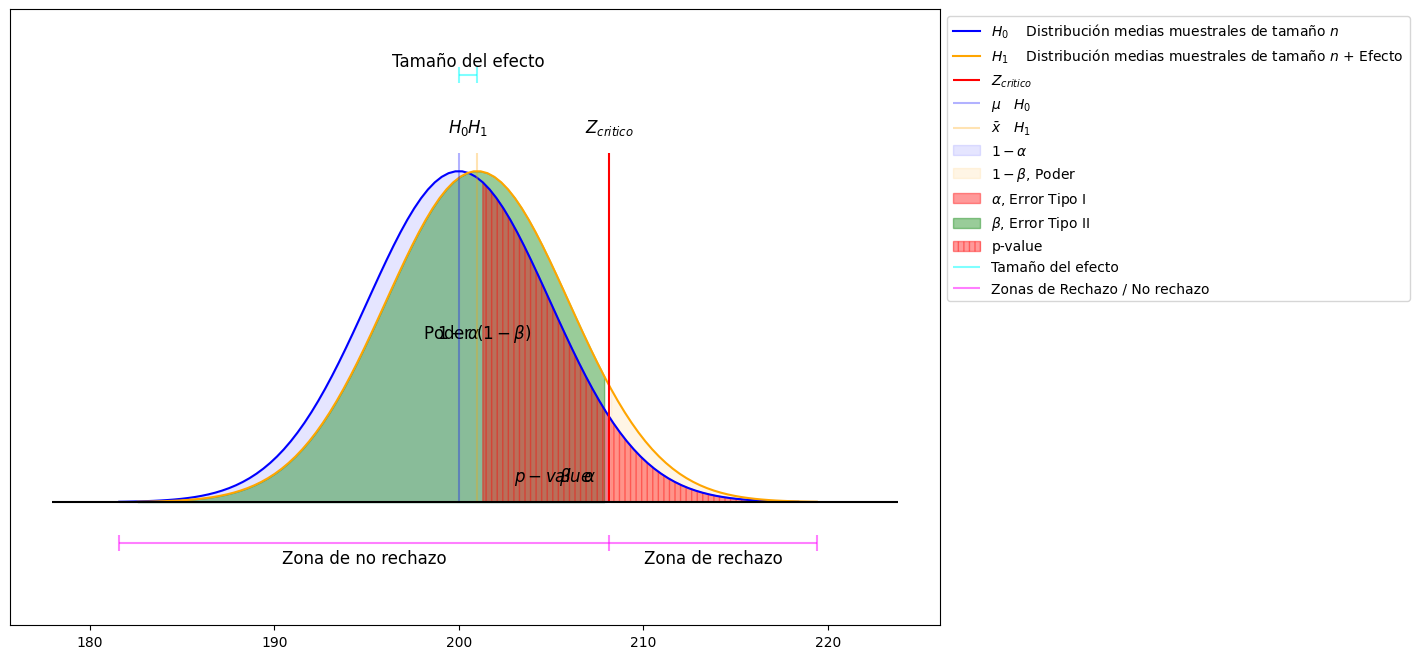

Poder de la prueba:  0.07


In [ ]:
#####################################################################
## 4. un tamaño de efecto insignificante
## Se disminuye tamaño delefecto hasta dejarlo al minimo
#####################################################################

# Cargamos data línea base
Mu = 200
Sigma = 35

# Resltados del tratamiento
n = 50
x_bar = 201
# Tamaño del efecto
efecto = x_bar - Mu #12 minutos de diferencia

# 1) Definir hipótesis a contrastar (prueba unilateral - cola derecha)
alpha = 0.05

 # H0:   Mu = 200
 # H1:   Mu =  212


# 2) Buscar valor crítico de Z
Zcritico = stats.norm.ppf(1-alpha)# 1 cola
print(f'Z crítico: {Zcritico: 4.2f}')

# 3) Calcular el valor en minutos correspondiente al Z crítico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print(f"Valor media para Z crítico: {valor_minutos_zcritico: 4.2f}")
# Visualizando la distribución de las medias muestrales y límites

# Proyectar distribución H0
muestral_z = stats.norm(Mu, Sigma/np.sqrt(n))
x_z0 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z0 = muestral_z.pdf(x_z0) # función densidad probabilidad


# Proyectar distribución H1
muestral_z = stats.norm(x_bar, Sigma/np.sqrt(n))
x_z1 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z1 = muestral_z.pdf(x_z1) # función densidad probabilidad

# Ploteo de gráficos principales
plt.figure(figsize=(12, 8)) # tamaño gráfico
plt.plot(x_z0, pdf_z0, color='b', label='$H_0 \quad$ Distribución medias muestrales de tamaño $n$') # medias H0
plt.plot(x_z1, pdf_z1, color='orange', label='$H_1 \quad$ Distribución medias muestrales de tamaño $n$ + Efecto') # medias H1

# Ploteo de líneas verticales
plt.vlines(ymin=0, ymax=0.085, x=valor_minutos_zcritico,  colors='r', label='$Z_{critico}$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=Mu,  colors='b', alpha=0.3, label='$\mu \quad H_0$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=x_bar,  colors='orange', alpha=0.3, label=r'$\bar{x} \quad H_1$', zorder=9)
plt.ylim(-0.03, 0.12)
plt.yticks([])

# Ploteo de línea horizontal
plt.hlines(xmin=min(x_z0)*0.98, xmax=max(x_z1)*1.02, y=0,  colors='k', alpha=1, zorder=10)

# Relleno (fill) de áreas
# Fill de 1 - alfa
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 < valor_minutos_zcritico),
                 color='b', alpha=0.1, label=r'$1-\alpha$')
# Fill de 1 - beta (Potencia)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 > valor_minutos_zcritico),
                 color='orange', alpha=0.1, label=r'$1 - \beta$, Poder')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > valor_minutos_zcritico) & (x_z0 <= x_bar),
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 < valor_minutos_zcritico),
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
# Fill de p-value
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > x_bar),
                 color='r', hatch='|||', alpha=0.4, label=r'p-value')

# Textos y anotaciones
plt.text(Mu, 0.04, r'$1-\alpha$', fontsize=12, ha='center')
plt.text((Mu + ((valor_minutos_zcritico-Mu)*2/3)), 0.005, r'$\beta$', fontsize=12)
plt.text((valor_minutos_zcritico + ((x_bar-valor_minutos_zcritico)/5)), 0.005, r'$\alpha$', fontsize=12)
plt.text(x_bar*1.01, 0.005, r'$p-value$', fontsize=12)
plt.text(x_bar, 0.04, r'Poder $(1-\beta)$', fontsize=12, ha='center')
plt.text(Mu, 0.09, r'$H_0$', fontsize=12, ha='center')
plt.text(valor_minutos_zcritico, 0.09, r'$Z_{critico}$', fontsize=12, ha='center')
plt.text(x_bar, 0.09, r'$H_1$', fontsize=12, ha='center')

# Tamaño del efecto
plt.hlines(xmin=Mu, xmax=x_bar, y=0.104,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
plt.vlines(ymin=0.102, ymax=0.106, x=Mu,  colors='cyan', alpha=0.5)
plt.vlines(ymin=0.102, ymax=0.106, x=x_bar,  colors='cyan', alpha=0.5)
plt.text((Mu + (x_bar-Mu)/2), 0.106, r'Tamaño del efecto', fontsize=12, ha='center')

# Zonas de rechazo y no rechazo
plt.hlines(xmin=min(x_z0), xmax=max(x_z1), y=-0.01,  colors='magenta', alpha=0.5, label='Zonas de Rechazo / No rechazo')
plt.vlines(ymin=-0.008, ymax=-0.012, x=min(x_z0),  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=valor_minutos_zcritico,  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=max(x_z1),  colors='magenta', alpha=0.5)
plt.text((min(x_z0) + ((valor_minutos_zcritico-min(x_z0))/2)), -0.015, r'Zona de no rechazo', fontsize=12, ha='center')
plt.text((valor_minutos_zcritico + ((max(x_z1)-valor_minutos_zcritico)/2)), -0.015, r'Zona de rechazo', fontsize=12, ha='center')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
Poder = stats.norm(x_bar, Sigma/np.sqrt(n)).sf(valor_minutos_zcritico)
print(f'Poder de la prueba: {Poder: 4.2f}')

Z crítico:  1.64
Valor media para Z crítico:  208.14


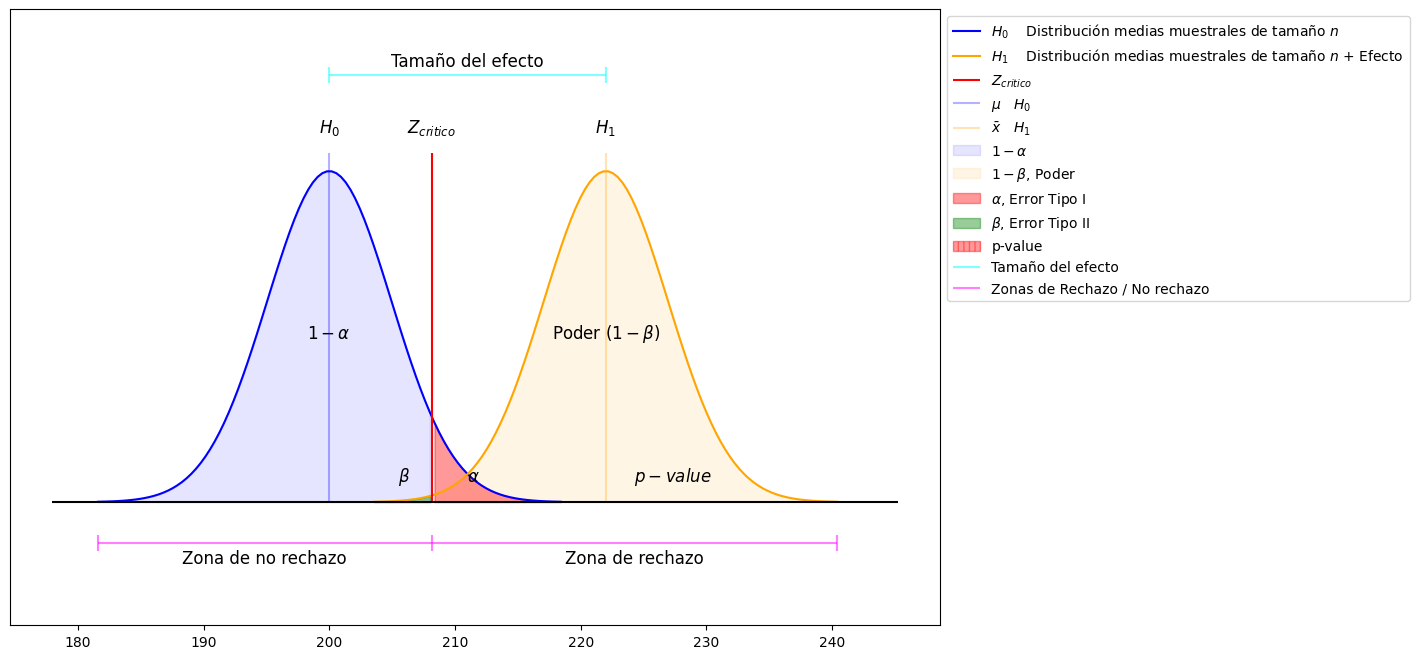

Poder de la prueba:  1.00


In [ ]:
#####################################################################
## 5.una  H0  no rechazada
## Se aumenta tamaño del efecto
#####################################################################

# Cargamos data línea base
Mu = 200
Sigma = 35

# Resltados del tratamiento
n = 50
x_bar = 222
# Tamaño del efecto
efecto = x_bar - Mu #12 minutos de diferencia

# 1) Definir hipótesis a contrastar (prueba unilateral - cola derecha)
alpha = 0.05

 # H0:   Mu = 200
 # H1:   Mu =  212


# 2) Buscar valor crítico de Z
Zcritico = stats.norm.ppf(1-alpha)# 1 cola
print(f'Z crítico: {Zcritico: 4.2f}')

# 3) Calcular el valor en minutos correspondiente al Z crítico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print(f"Valor media para Z crítico: {valor_minutos_zcritico: 4.2f}")
# Visualizando la distribución de las medias muestrales y límites

# Proyectar distribución H0
muestral_z = stats.norm(Mu, Sigma/np.sqrt(n))
x_z0 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z0 = muestral_z.pdf(x_z0) # función densidad probabilidad


# Proyectar distribución H1
muestral_z = stats.norm(x_bar, Sigma/np.sqrt(n))
x_z1 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z1 = muestral_z.pdf(x_z1) # función densidad probabilidad

# Ploteo de gráficos principales
plt.figure(figsize=(12, 8)) # tamaño gráfico
plt.plot(x_z0, pdf_z0, color='b', label='$H_0 \quad$ Distribución medias muestrales de tamaño $n$') # medias H0
plt.plot(x_z1, pdf_z1, color='orange', label='$H_1 \quad$ Distribución medias muestrales de tamaño $n$ + Efecto') # medias H1

# Ploteo de líneas verticales
plt.vlines(ymin=0, ymax=0.085, x=valor_minutos_zcritico,  colors='r', label='$Z_{critico}$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=Mu,  colors='b', alpha=0.3, label='$\mu \quad H_0$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=x_bar,  colors='orange', alpha=0.3, label=r'$\bar{x} \quad H_1$', zorder=9)
plt.ylim(-0.03, 0.12)
plt.yticks([])

# Ploteo de línea horizontal
plt.hlines(xmin=min(x_z0)*0.98, xmax=max(x_z1)*1.02, y=0,  colors='k', alpha=1, zorder=10)

# Relleno (fill) de áreas
# Fill de 1 - alfa
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 < valor_minutos_zcritico),
                 color='b', alpha=0.1, label=r'$1-\alpha$')
# Fill de 1 - beta (Potencia)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 > valor_minutos_zcritico),
                 color='orange', alpha=0.1, label=r'$1 - \beta$, Poder')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > valor_minutos_zcritico) & (x_z0 <= x_bar),
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 < valor_minutos_zcritico),
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
# Fill de p-value
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > x_bar),
                 color='r', hatch='|||', alpha=0.4, label=r'p-value')

# Textos y anotaciones
plt.text(Mu, 0.04, r'$1-\alpha$', fontsize=12, ha='center')
plt.text((Mu + ((valor_minutos_zcritico-Mu)*2/3)), 0.005, r'$\beta$', fontsize=12)
plt.text((valor_minutos_zcritico + ((x_bar-valor_minutos_zcritico)/5)), 0.005, r'$\alpha$', fontsize=12)
plt.text(x_bar*1.01, 0.005, r'$p-value$', fontsize=12)
plt.text(x_bar, 0.04, r'Poder $(1-\beta)$', fontsize=12, ha='center')
plt.text(Mu, 0.09, r'$H_0$', fontsize=12, ha='center')
plt.text(valor_minutos_zcritico, 0.09, r'$Z_{critico}$', fontsize=12, ha='center')
plt.text(x_bar, 0.09, r'$H_1$', fontsize=12, ha='center')

# Tamaño del efecto
plt.hlines(xmin=Mu, xmax=x_bar, y=0.104,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
plt.vlines(ymin=0.102, ymax=0.106, x=Mu,  colors='cyan', alpha=0.5)
plt.vlines(ymin=0.102, ymax=0.106, x=x_bar,  colors='cyan', alpha=0.5)
plt.text((Mu + (x_bar-Mu)/2), 0.106, r'Tamaño del efecto', fontsize=12, ha='center')

# Zonas de rechazo y no rechazo
plt.hlines(xmin=min(x_z0), xmax=max(x_z1), y=-0.01,  colors='magenta', alpha=0.5, label='Zonas de Rechazo / No rechazo')
plt.vlines(ymin=-0.008, ymax=-0.012, x=min(x_z0),  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=valor_minutos_zcritico,  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=max(x_z1),  colors='magenta', alpha=0.5)
plt.text((min(x_z0) + ((valor_minutos_zcritico-min(x_z0))/2)), -0.015, r'Zona de no rechazo', fontsize=12, ha='center')
plt.text((valor_minutos_zcritico + ((max(x_z1)-valor_minutos_zcritico)/2)), -0.015, r'Zona de rechazo', fontsize=12, ha='center')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
Poder = stats.norm(x_bar, Sigma/np.sqrt(n)).sf(valor_minutos_zcritico)
print(f'Poder de la prueba: {Poder: 4.2f}')

Z crítico:  1.28
Valor media para Z crítico:  206.34


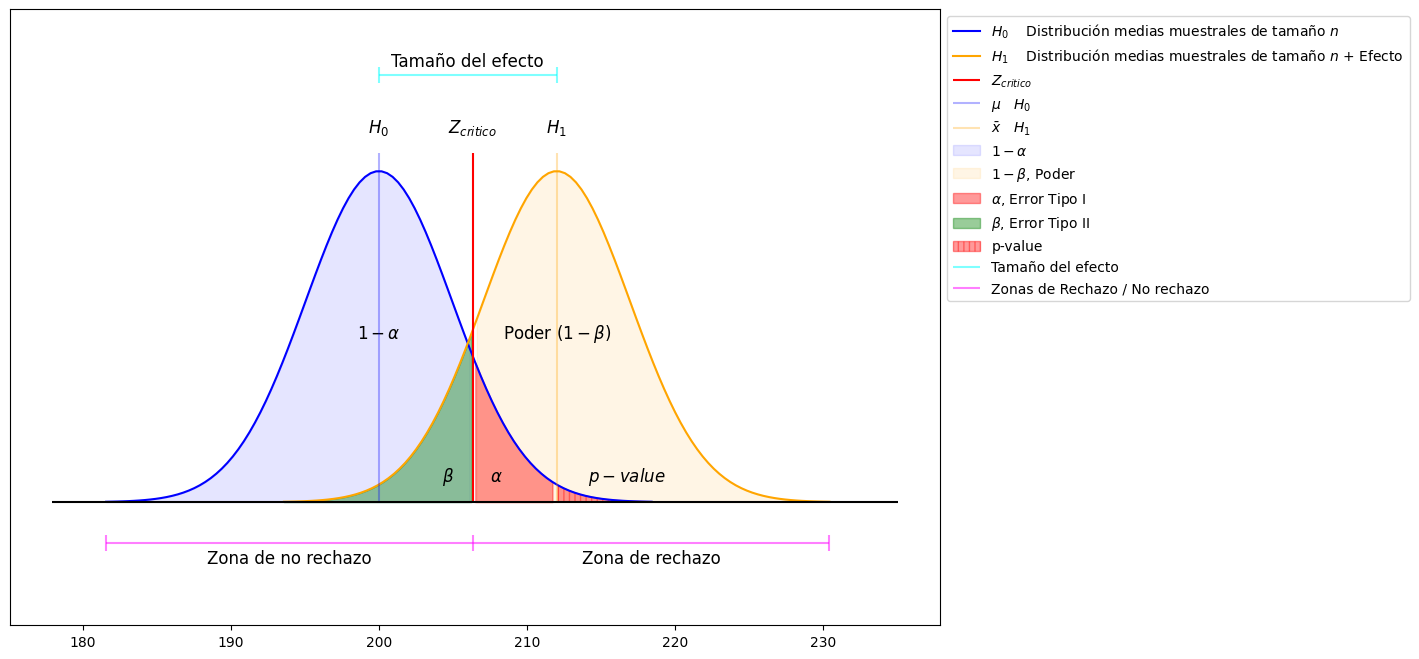

Poder de la prueba:  0.87


In [ ]:
#####################################################################
## 6. un  α=0.1
#####################################################################

# Cargamos data línea base
Mu = 200
Sigma = 35

# Resltados del tratamiento
n = 50
x_bar = 212
# Tamaño del efecto
efecto = x_bar - Mu #12 minutos de diferencia

# 1) Definir hipótesis a contrastar (prueba unilateral - cola derecha)
alpha = 0.1

 # H0:   Mu = 200
 # H1:   Mu =  212


# 2) Buscar valor crítico de Z
Zcritico = stats.norm.ppf(1-alpha)# 1 cola
print(f'Z crítico: {Zcritico: 4.2f}')

# 3) Calcular el valor en minutos correspondiente al Z crítico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print(f"Valor media para Z crítico: {valor_minutos_zcritico: 4.2f}")
# Visualizando la distribución de las medias muestrales y límites

# Proyectar distribución H0
muestral_z = stats.norm(Mu, Sigma/np.sqrt(n))
x_z0 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z0 = muestral_z.pdf(x_z0) # función densidad probabilidad


# Proyectar distribución H1
muestral_z = stats.norm(x_bar, Sigma/np.sqrt(n))
x_z1 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z1 = muestral_z.pdf(x_z1) # función densidad probabilidad

# Ploteo de gráficos principales
plt.figure(figsize=(12, 8)) # tamaño gráfico
plt.plot(x_z0, pdf_z0, color='b', label='$H_0 \quad$ Distribución medias muestrales de tamaño $n$') # medias H0
plt.plot(x_z1, pdf_z1, color='orange', label='$H_1 \quad$ Distribución medias muestrales de tamaño $n$ + Efecto') # medias H1

# Ploteo de líneas verticales
plt.vlines(ymin=0, ymax=0.085, x=valor_minutos_zcritico,  colors='r', label='$Z_{critico}$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=Mu,  colors='b', alpha=0.3, label='$\mu \quad H_0$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=x_bar,  colors='orange', alpha=0.3, label=r'$\bar{x} \quad H_1$', zorder=9)
plt.ylim(-0.03, 0.12)
plt.yticks([])

# Ploteo de línea horizontal
plt.hlines(xmin=min(x_z0)*0.98, xmax=max(x_z1)*1.02, y=0,  colors='k', alpha=1, zorder=10)

# Relleno (fill) de áreas
# Fill de 1 - alfa
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 < valor_minutos_zcritico),
                 color='b', alpha=0.1, label=r'$1-\alpha$')
# Fill de 1 - beta (Potencia)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 > valor_minutos_zcritico),
                 color='orange', alpha=0.1, label=r'$1 - \beta$, Poder')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > valor_minutos_zcritico) & (x_z0 <= x_bar),
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 < valor_minutos_zcritico),
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
# Fill de p-value
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > x_bar),
                 color='r', hatch='|||', alpha=0.4, label=r'p-value')

# Textos y anotaciones
plt.text(Mu, 0.04, r'$1-\alpha$', fontsize=12, ha='center')
plt.text((Mu + ((valor_minutos_zcritico-Mu)*2/3)), 0.005, r'$\beta$', fontsize=12)
plt.text((valor_minutos_zcritico + ((x_bar-valor_minutos_zcritico)/5)), 0.005, r'$\alpha$', fontsize=12)
plt.text(x_bar*1.01, 0.005, r'$p-value$', fontsize=12)
plt.text(x_bar, 0.04, r'Poder $(1-\beta)$', fontsize=12, ha='center')
plt.text(Mu, 0.09, r'$H_0$', fontsize=12, ha='center')
plt.text(valor_minutos_zcritico, 0.09, r'$Z_{critico}$', fontsize=12, ha='center')
plt.text(x_bar, 0.09, r'$H_1$', fontsize=12, ha='center')

# Tamaño del efecto
plt.hlines(xmin=Mu, xmax=x_bar, y=0.104,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
plt.vlines(ymin=0.102, ymax=0.106, x=Mu,  colors='cyan', alpha=0.5)
plt.vlines(ymin=0.102, ymax=0.106, x=x_bar,  colors='cyan', alpha=0.5)
plt.text((Mu + (x_bar-Mu)/2), 0.106, r'Tamaño del efecto', fontsize=12, ha='center')

# Zonas de rechazo y no rechazo
plt.hlines(xmin=min(x_z0), xmax=max(x_z1), y=-0.01,  colors='magenta', alpha=0.5, label='Zonas de Rechazo / No rechazo')
plt.vlines(ymin=-0.008, ymax=-0.012, x=min(x_z0),  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=valor_minutos_zcritico,  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=max(x_z1),  colors='magenta', alpha=0.5)
plt.text((min(x_z0) + ((valor_minutos_zcritico-min(x_z0))/2)), -0.015, r'Zona de no rechazo', fontsize=12, ha='center')
plt.text((valor_minutos_zcritico + ((max(x_z1)-valor_minutos_zcritico)/2)), -0.015, r'Zona de rechazo', fontsize=12, ha='center')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
Poder = stats.norm(x_bar, Sigma/np.sqrt(n)).sf(valor_minutos_zcritico)
print(f'Poder de la prueba: {Poder: 4.2f}')

<font color='green'>Fin actividad 1</font>

## <font color='blue'>**Tamaño del efecto**</fontr>

El tamaño del efecto es el principal hallazgo de un estudio cuantitativo y debe ser informado junto con la significancia estadística (__valor-p__), esto debido a que el valor-p puede informar si existe un efecto, pero no revelará el tamaño de dicho efecto (significancia sustantiva).

Una prueba estadística con una muestra suficientemente grande, casi siempre reportará una diferencia estadísticamente significativa (p-value < alpha). Por lo tanto, informar sólo el valor-p de la investigación sin el 'tamaño del efecto' resulta incompleto para que la audiencia comprenda adecuadamente los resultados y/o posteriormente se pueda realizar un análisis profundo.

## <font color='blue'>**Experimentos**</fontr>
Un **experimento** es un procedimiento llevado a cabo para apoyar, refutar, o validar una hipótesis.

<img src='https://drive.google.com/uc?export=view&id=1KoQWMbKXcvTQNZxmPmRIYdunJO0cGhZP' width="600" align="center" style="margin-right: 20px">
<br>


En este modulo vamos a compartir un set de pruebas estadísticas con el fin de evaluar los resultados de los experimentos. Principalmente nos enfocaremos en 2 tipos de experimentos:

* __Experimento controlado__: compara los resultados obtenidos de muestras experimentales con muestras de control, que son prácticamente idénticas a la muestra experimental, excepto por el aspecto cuyo efecto se está probando (la variable independiente). El cálculo de Poder para este tipo de experimento será presentado en el Notebook **IE12_Prueba_de_Hipotesis_para_2_muestras_y_Poder_estadístico**

* __Experimento no controlado (o natural)__:  generalmente tienen lugar en entornos no controlados, las variables de fuentes no detectadas no se miden ni se mantienen constantes, y esto puede producir correlaciones ilusorias en las variables en estudio. Los experimentos naturales son más útiles cuando se ha producido un cambio claramente definido y grande en el tratamiento (o exposición) a una subpoblación claramente definida (y ningún cambio a una subpoblación comparable), por lo que los cambios en las respuestas pueden ser plausiblemente atribuidos al cambio producido por el tratamiento (o exposición). El cálculo de Poder para este tipo de experimento será presentado en este mismo notebook con un ejemplo.




Recordemos que un Experimento al que se aplica el método científico incorpora una secuencia de pasos, como la que se muestra a continuación:

* Paso 0: Identificar un problema.
* Paso 1: Elaborar una hipótesis.
* Paso 2: Seleccionar una muestra.
* Paso 3: Ejecutar el experimento (prueba la hipótesis)
* Paso 4: Analizar los datos, medir los resultados y generar conclusiones.
* Paso 5: Tomar acciones.

En equipos de trabajo del mundo digital (growth team) aplican el proceso de experimentación en adherencia al método científico. Veamos estos pasos de forma gráfica:

<img src='https://drive.google.com/uc?export=view&id=19udS6E2oDCOocEHyrhU7jmU_u5t_ab6o' width="600" align="center" style="margin-right: 20px">
<br>


<p style="font-size:8pt">
Imagen gentileza de: Roberto Moraga</p>

## <font color='blue'>**Ejemplo de Experimento Natural (no controlado)**</fontr>

En este ejemplo vamos a presentar la forma sobre como calcular el Poder estadístico en un __experimento natural__ (una muestra contra un target).

Imaginemos que formamos parte de un Equipo Digital en una organización de servicios financieros B2C (business to customer), y se tiene a cargo el desarrollo y evolución del sitio web de esta organización.

En los últimos meses se ha visto una disminución de tráfico (cantidad de visitas) en el sitio web, y además el indicador Tasa de Rebote (_bounce rate_; los clientes entran y salen en un tiempo inferior $t$ segundos) ha superado el umbral del 50%, exhibiendo un valor de 53%.

Véase gráfico adjunto para más detalle:

<img src='https://drive.google.com/uc?export=view&id=1ZhKs4HPbDjUJP0VQRFmpYSYT173eX1D2' width="400" align="center" style="margin-right: 20px">
<br>


Apliquemos los pasos de nuestro flujo.

### <font color='blue'>**0. Seleccionar un desafío de negocio**</fontr>

En este caso el desafío es aumentar el _engagement_ en el sitio web de la compañía.

* **Métrica de éxito.** Podemos utilizar una de las siguientes métricas:
 * Tasa de rebote (%)
 * Tiempo promedio visita (minutos).


>Nota: Utilizaremos la primera (tasa de rebote), la cual al ser una proporción nos permitirá aplicar una prueba $Z$ de 1 muestra. En el caso de utilizar la segunda métrica (tiempo promedio visita), la misma nos permitiría utilizar las pruebas _T Student_ o $Z$ de 1 muestra.

### <font color='blue'>**1. Definir una hipótesis**</fontr>

Tenemos las siguientes ideas para mejorar el engagement (léalas de la forma "Si \<idea\...>  entonces se producirá una mejora en el engagement"):
1.  cambiamos el color del fondo (actual naranjo, cambiar por un celeste)
2.  cambiamos la imagen de bienvenida (actual un paisaje, cambiar por una persona sonriendo)
3.  cambiamos la tipografía del sitio (actual Times, cambiar por Corbel)
4.  cambiamos el texto del CTA (call to action)
5.  etc.

Para seguir con nuestro ejemplo, priorizaremos la idea #2.
* Definir lo que se va a probar: una nueva imagen de bienvenida al sitio (esta será la nueva versión del sitio web).
* __Hipótesis__: una imagen de una persona sonriendo en la bienvenida, aumentará el engagement del usuario con el sitio web, ya que genera mayor confianza en los visitantes.


La prueba de hipótesis estadística aquí sería:
* __Hipótesis nula__ (__$H_0$__): la proporción de visitantes que abandonan el sitio web (antes de 1 minuto)  es **igual** a la del rendimiento actual (línea base), es decir, un 53%.
* __Hipótesis alternativa__ (__$H_1$)__: la proporción de visitantes que abandonan el sitio web (antes de 1 minuto)  es **menor** a la del rendimiento actual (línea base), es decir, menor a 53%.

Planteamiento estadístico:
$$H_0: \quad p = 0.53$$
$$H_1: \quad p < 0.53$$


>Nota: Como ya hemos visto, la hipótesis que se desea rechazar se planteó en la nula y la que se desea probar en la alternativa.


### <font color='blue'>**2. Determinar el tamaño de la muestra**</fontr>


En este paso haremos un **Análisis a priori** para determinar el tamaño correcto de la muestra donde aplicaremos el experimento.

Este tamaño es la cantidad mínima de sujetos/individuos que deben inscribirse en un estudio para tener el poder estadístico suficiente para detectar un efecto del tratamiento.

Es importante mencionar que antes de realizar un estudio, los investigadores (ustedes) deben determinar cuántos sujetos deben incluirse en el experimento. Si se aplica el experimento a muy pocos sujetos, es posible que un estudio no tenga suficiente poder estadístico para detectar una diferencia (__error de tipo II__). Por el contrario si el experimento se aplica a demasiados sujetos puede ser innecesariamente costoso o llevarnos mucho tiempo.


Para determinar la cantidad adecuada es necesario contar con los siguientes parámetros:

* Nivel de significancia ($\alpha$ o Error Tipo I)
* Potencia de prueba ($1- \beta$)
* Tamaño del efecto deseado
* Varianza de la población ($\sigma$)

Normalmente se presetea $\;\alpha = 0.05$, $\;\beta = 0.20$, y con ello la $\text{Potencia} = 0.80$.

Para determinar el tamaño del efecto deseado, es necesario hablar con el cuerpo expertos en esta materia en la organozación. Imaginemos que estos expertos nos indican que, para el negocio, es crítico bajar en 500 puntos base (5%) en términos absolutos. De esta forma, con la nueva versión (tratamiento) el porcentaje de visitantes que abandona el sitio antes de un minuto sea menor o igual a 48% (i.e., $0.53 - 0.05 = 0.48$).

>Nota: el tamaño del efecto también puede ser obtenido a partir de análisis exploratorios que demuestran que al conseguir cierto valor en la métrica operativa a mejorar, se impacta positivamente otra métrica de negocio (revenue, ARPU, Lifetime value, EBITDA), definiciones estratégicas, benchmarks o normativas internacionales, etc.


Este análisis se llama __análisis a priori__ ya que primero se diseña el experimento y luego se ejecuta. Esto se realiza con base en el $\alpha$, $\beta$, $\sigma$ y tamaño del efecto mínimo a detectar, y desde allí se obtiene el tamaño de la muestra mínima a la cuál se aplicará el experimento o tratamiento.

Datos:
* Efecto mínimo a determinar: 0.05
* Nivel de significancia ($\alpha$): 0.05 (pre-seteado por defecto)
* $\beta$: 0.20 (pre-seteado por defecto)
* Potencia o Poder ($1 - \beta$): 0.80
* Varianza: se aplicará la varianza de proporciones de la línea base

$$\sqrt{p*(1-p)}$$

* Tipo de prueba: 2 colas (two-sided). Esta prueba es más conservadora entregando un mayor tamaño muestral. También se puede utilizar la prueba de 1 cola (menor que) dado que lo que se busca es reducir la proporción de rebote (abandono antes de 1 minuto).


A continuación calcularemos el tamaño mínimo de la muestra con la siguiente ecuación:

$$N =  \frac{p_0 q_0 \left(z_{1-\alpha/2} \; + \; z_{1-\beta} \sqrt{\frac{p_1q_1}{p_0q_0}}\right)^2}{(p_1 - p_0)^2}$$

con:<br>
$q_0 = 1 - p_0$<br>
$q_1 = 1 - p_1$


y donde:
* $p_0$ = proporcion de la población
* $p_1$ = proporción del grupo de estudio (valor mínimo que quisiéramos alcanzar)
* $N$ = tamaño de la muestra del grupo de estudio
* $\alpha$ = probabilidad del error tipo I (0.05)
* $\beta$ = probabilidad del error tipo II (0.2)
* $Z$ = valor crítico de $Z$ para un $\alpha$ y un $\beta$ dados.

In [ ]:
# Datos para la ecuación
# Escenario conservador con dos colas

p0 = 0.53 # línea base de proporción rebote
efecto_bruto = 0.05 # valor mínimo (diferencia) a detectar como mejora del estudio
p1 = p0 - efecto_bruto
alpha = 0.05
beta = 0.20

# Por defecto stats.norm genera una distribución normal estandarizada,
# de ahí que nos sirve para calcular los valores de Z
N = ((p0 * (1 - p0) * (stats.norm.ppf(1-alpha/2) + stats.norm.ppf(1-beta) * np.sqrt((p1*(1-p1)) / (p0 * (1-p0))))**2 )
    / (p1 - p0)**2)

print(f'Tamaño mínimo muestra: {N:5.1f}')


Tamaño mínimo muestra: 782.5


**Alternativa al cálculo del tamaño nuestral con T-Student**:
A continuación, aplicaremos la prueba de 1 muestra de Student, la cual funciona bien con muestras menores a 30, y entrega resultados muy similares a la prueba $Z$ cuando la muestra es superior a 30.
>Nota: esta es una alternativa, pero se recomienda utilizar la fórmula anterior.

In [ ]:
# cargar libería Stats Model
from statsmodels.stats.power import tt_solve_power

# definir datos de la prueba
p0 = 0.53 # linea base
efecto_bruto = 0.05
p1 = p0 - efecto_bruto
sigma = np.sqrt(p0 * (1- p0))
alpha = 0.05
beta = 0.20
poder = 1 - beta

# calcular el tamaño muestral
tt_solve_power(effect_size=efecto_bruto/sigma,
               nobs=None, # la variable que quedemos calcular
               alpha=alpha,
               power=poder,
               alternative='two-sided') # Prueba de dos colas


783.9833581448678

En este caso se necesitan al menos 784 visitas al sitio web con la nueva versión.

Nota: Existen diversas librerias y calculadoras de tamaño de muestra. En el ejemplo anterior se ha puesto una tomando Stats Models.  Si se necesita realizar un cálculo de tamaño muestral sin programar (non code) en este [link](https://clincalc.com/stats/samplesize.aspx) se puede acceder a una herramienta online.




> Nota:  si se quisiera realizar una prueba de 1 cola (cola izquierda en este caso), la ecuación debe ser $Z_{1-\alpha}$, en vez de  $Z_{1-\alpha/2}$. Esto nos dará una muestra menor, ed ahí que este caso es menos conservador que el anterior.
> <br><br>
>$$N =  \frac{p_0 q_0 \left(z_{1-\alpha} \; + \; z_{1-\beta} \sqrt{\frac{p_1q_1}{p_0q_0}}\right)^2}{(p_1 - p_0)^2}$$




In [ ]:
# Datos para la ecuación
# Escenario menos conservado con una cola. El tamaño muestral disminuye.
p0 = 0.53 # línea base de proporción rebote
efecto_bruto = 0.05 # valor minimo (diferencia) a detectar como mejora del estudio
p1 = p0 - efecto_bruto
alpha = 0.05
beta = 0.20

N = ((p0*(1-p0)*( stats.norm.ppf(1-alpha) + stats.norm.ppf(1-beta)* np.sqrt( (p1*(1-p1)) /(p0*(1-p0))))**2) /
     (p1 - p0)**2)

print(f'Tamaño mínimo muestra: {N:5.1f}')

Tamaño mínimo muestra: 616.4


In [ ]:
# Ahora lo mismo con statmodels aplicando T Student
# Nota: si se quisiera una prueba de 1 sola cola (en este caso cola izquierda)
# utilizar  alternative = 'smaller' o 'larger'

from statsmodels.stats.power import tt_solve_power

# definir datos de la prueba
p = 0.53 # Bounce rate / Tasa de rebote
efecto = 0.05
sigma = np.sqrt(p * (1- p))
alpha = 0.05
beta = 0.20
poder = 1 - beta

# calcular el tamaño muestral
tt_solve_power(effect_size=efecto/sigma,
               nobs=None, # Se apaga el parámetro buscado
               alpha=alpha,
               power=poder,
               alternative='larger') # usamos larger dado que el efecto está en
                                     # valor absoluto
               # Si queremos usar 'smaller', debemos evidenciar que el efecto = -0.05

617.3850329967271

### <font color='blue'>**3. Ejecutar el experimento**</fontr>

En esta parte el Equipo de Digital construye la nueva versión de la página web con la nueva imagen, define los días donde se ejecutará el experimento, y comienza a dirigir tráfico de forma aleatoria, hasta completar el tiempo del experimento y la cantidad mínima de la muestra.

Con los datos obtenidos, se procederá a realizar un análisis de datos en el siguiente paso.

### <font color='blue'>**4. Medir resultados**</fontr>

Se ha finalizado el periodo de experimentación de la nueva versión y se procede a evaluar su efectividad.

Para efectos demostrativos, asumiremos 3 posibles escenarios de experimentos, los cuales simulan condiciones reales típicas de este tipo de actividades.

1.   Escenario 1: se realizó una prueba de una semana en la cual tuvimos solo 350 visitantes, obteniendo una Tasa de Rebote de 47%.

2.   Escenario 2: se realizó una prueba de una semana en la cual tuvimos 700 visitantes, obteniendo una Tasa de Rebote de 49%.

3.   Escenario 3: se realizó una prueba de una semana en la cual tuvimos 700 visitantes, obteniendo una Tasa de Rebote de 47%.

La evaluación que se realizará en esta sección también es conocida como **Análisis post-hoc**. En esta parte del flujo, se evalúan los resultados de una investigación luego de correr un experimento. El uso de esta técnica sin el anterior uso previo del __Análisis a priori__, ha sido cuestionada ya que no permite diseñar y planear de antemano un estudio.

#### 4.1. Análisis del Escenario 1

Procedemos a calcular el valor de $Z$ crítico (para una prueba de 1 cola, cola izquierda con $\alpha = 0.05$) y su valor correspondiente de proporción muestral (para la tasa de rebote).  El valor que obtendremos en esta operación corresponderá a la proporción límite hasta donde la proporción muestral que se obtenga en el experimento, será considerada que cae en la zona de rechazo de la Hipótesis nula ($H_0$).  En otras palabras, si la proporción (tasa de rebote) que se obtenga con los 350 visitantes del estudio es menor a dicho valor, estaremos rechazando la Hipótesis nula, y por tanto concluiremos que el resultado del experimento es estadísticamente significativo.

Es importante mencionar que si esto sucede, este análisis  no indica nada sobre la relevancia del efecto práctico alcanzando. Esto se evaluará con el cálculo del Poder de la prueba.

In [ ]:
# Pasos
# 1) Cargamos data línea base (población)
p = 0.53
Sigma = np.sqrt(p* (1-p))

# 2) Cargar datos de la muestra
n = 350
p_muestra = 0.47 # Tasa de rebote
Sigma_muestra = np.sqrt(p_muestra * (1 - p_muestra))

# 3) Determinar el nivel de significancia de la prueba
alpha = 0.05

# 4) Definir hipótesis a contrastar (prueba unilateral - cola izquierda)
 # H0:   p = 0.53
 # H1:   p < 0.53

# regla decision (1 cola)
 # no rechazar H0 si: Z prueba >= Z crítico
 # rechazar HO si: Z prueba < Zcritico

# 5) Determinar el valor crítico de Z
Zcritico = stats.norm.ppf(alpha) # 1 cola izquierda
print(f'Z crítico: {Zcritico: 4.3f}')

# 5.1) Calcular el valor en porcentaje correspondiente al Z crítico
valor_proporcion_zcritico = stats.norm(p, Sigma/np.sqrt(n)).ppf(alpha) # buscar valor cola izquierda
print(f"Valor media para Z crítico: {valor_proporcion_zcritico: 4.3f}")

Z crítico: -1.645
Valor media para Z crítico:  0.486


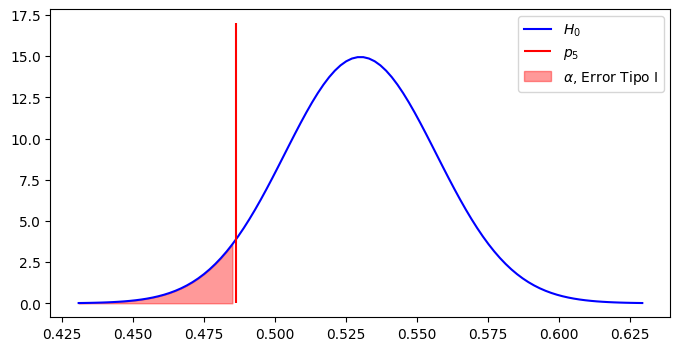

In [ ]:
# visualizando la distribución de las proprociones muestrales cuando el n=350
# y el límite crítico de Rechazo H0

# proyectar distribución H0
muestral_z = stats.norm(p, Sigma / np.sqrt(n))
x_z = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z = muestral_z.pdf(x_z) # función densidad probabilidad

plt.figure(figsize=(8, 4)) # tamaño gráfico
plt.plot(x_z, pdf_z, "b", label='$H_0$') # medias H0
plt.vlines(ymin=0, ymax=17, x=valor_proporcion_zcritico,  colors='r', label='$p_{5}$')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z, pdf_z,
                 where = x_z <= valor_proporcion_zcritico,
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
plt.legend()
plt.show()

Para esta prueba de Hipótesis, como el valor de proporción muestral obtenido con los 350 visitantes fue de "Tasa rebote= 47%", cifra menor al límite de 0.486, se puede concluir que el rebote obtenido con la nueva versión ha disminuido de forma estadísticamente significativa, esto al comparar con su línea base de 0.53.

Otra forma de evaluar este paso es calculando el _valor-p_ (_p-value_), si este valor es menor al Nivel de significancia establecido, se procede a Rechazar la $H_0$ (Hipótesis Nula), de lo contrario no se puede rechazar la $H_0$.

In [ ]:
## 6) Calcular el estadístico Z de prueba.
Z = (p_muestra - p) / (Sigma /np.sqrt(n))
print(f'Z prueba: {Z:5.2f}')

## 7) Calcular el p-value y comparar con el nivel de significancia establecido.
# calcular p-value
pvalue = stats.norm.cdf(Z) # Z de prueba se encuentra en cola izquierda
print(f'p-value (significancia estadística): {pvalue:5.2f}') # 1 cola

# Otra forma usando Scipy
pvalue2 = stats.norm(p, Sigma /np.sqrt(n)).cdf(p_muestra)
print(f'p-value con scipy: {pvalue2:5.2f}')

Z prueba: -2.25
p-value (significancia estadística):  0.01
p-value con scipy:  0.01


**Concluir prueba de hipótesis:**
Como el $Z$ prueba (-2.249) es menor al $Z$ critico (-1.645), o como el valor-p ($\text{p-value}=0.012$) es menor al Nivel de signficancia "alpha" establecido en 0.05, se rechaza $H_0$. Por tanto se concluye que existe una diferencia estadísticamente significativa entre la tasa de rebote exhibida en la nueva versión y la tasa de rebote de la línea base.

Una vez finalizada esta parte de la prueba, __y siempre que se haya rechazado la $H_0$__, se procede a realizar el cálculo del tamaño del efecto real y el Poder de la prueba (potencia estadística).  En caso contrario no es necesario continuar, ya que el resultado obtenido en la nueva versión no sería menor a la línea base de la organización.

In [ ]:
# Ahora tendremos las siguientes hipótesis
  # H0: p = 0.53
  # H1: p = 0.47
H1 = p_muestra

# 8) Calcular el tamaño del efecto
efecto = (p - p_muestra) # Diferencia bruta
dCohen = efecto/Sigma # d de Cohen
print(f'd Cohen: {dCohen: 4.3f}')
print(f'Tamaño del efecto: {efecto: 4.3f}')

# 9) Calcular la potencia de la prueba (1 - beta)
# Calcular Beta (error tipo II)
# Forma simple con Scipy
beta = 1 - stats.norm(H1, Sigma/np.sqrt(n)).cdf(valor_proporcion_zcritico)
print(f'Beta: {beta: 5.3f}')
potencia = 1 - beta
# Calcular Potencia estadística (1- beta)
print(f'Potencia de la prueba: {potencia: 5.3f}')

d Cohen:  0.120
Tamaño del efecto:  0.060
Beta:  0.273
Potencia de la prueba:  0.727


Un hack es aplicar la prueba T Student de 1 muestra de Statsmodel, cambiando los parámetros. Los resultados serán muy similares a prueba Z de 1 muestra ya que el tamaño de la muestra es mayor a 120. Pero, no olvidar que para proporciones la prueba aplicable es Z.

In [ ]:
# cargar Liberia Stats Model
from statsmodels.stats.power import tt_solve_power

# definir datos de la prueba
p0 = 0.53 # linea base de prop de notas 6 y 7
p1 = 0.47
efecto_bruto = p1 - p0
n = 350
sigma = np.sqrt(p0 * (1- p0))
alpha = 0.05

# calcular el tamaño muestral
poder = tt_solve_power(effect_size=efecto_bruto/sigma,
                       nobs=n,
                       alpha=alpha,
                       power=None,
                       alternative='smaller')
print(f'Poder con Statasmodel: {poder:5.2f}')


Poder con Statasmodel:  0.73


**Conclusión final del Escenario 1**

El tratamiento aplicado "nueva versión del sitio web" en 350 usuarios aleatorios durante 1 semana, demuestra que la Tasa de Rebote de 47% exhibida es estadísticamente menor que el actual, esto con un nivel de confianza del 0.95.

También se aprecia que la diferencia (tamaño del efecto bruto) obtenida es relevante desde el punto de vista de negocio, ya que es de 600 puntos base (mayor al mínimo exigido), sin embargo al evaluar su potencia, el análisis arrojó un Poder por debajo del mínimo recomendable de 0.80, es decir, el efecto no tiene una potencia aceptable para respaldar la $H_1$ (Hipótesis alternativa).
Se concluye que no se puede afirmar que el tratamiento funciona. Dicho de otra manera, si se rechaza la Hipótesis nula ($H_0$) existe una alta probabilidad de cometer __Error Tipo II__ ($beta = 0.273$).



<img src='https://drive.google.com/uc?export=view&id=1kVO6YHNNlLNqf-X-QCf8l8MNq06qRB9a' width="800" align="center" style="margin-right: 20px">
<br>

<p style="font-size:8pt">
Imagen gentileza de: Roberto Moraga </p>



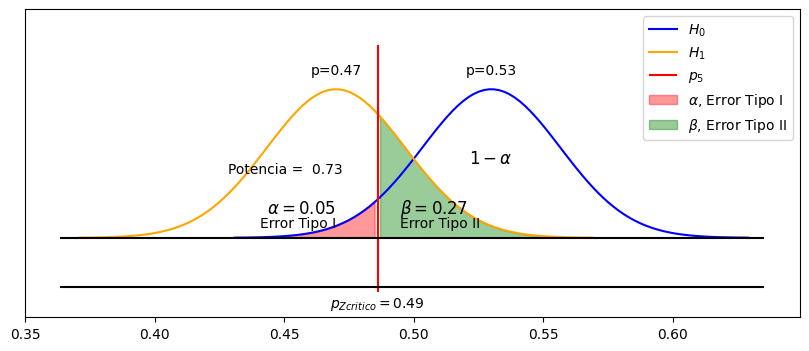

In [ ]:
# Visualizando
# Proyectar distribucion H0
h0_z = stats.norm(p, Sigma / np.sqrt(n))
x0_z = np.linspace(h0_z.ppf(0.0001), h0_z.ppf(0.9999), 100)
pdf0_z = h0_z.pdf(x0_z) # Función densidad probabilidad

# proyectar distribucion H1
h1_z = stats.norm(H1, Sigma / np.sqrt(n))
x1_z = np.linspace(h1_z.ppf(0.0001), h1_z.ppf(0.9999), 100)
pdf1_z = h1_z.pdf(x1_z) # Función densidad probabilidad

plt.figure(figsize=(10, 4)) # Tamaño gráfico
plt.plot(x0_z, pdf0_z,"b", label='$H_0$') # medias H0
plt.plot(x1_z, pdf1_z,"orange", label='$H_1$') # medias H1
plt.vlines(ymin=-5.5, ymax=max(pdf0_z)*1.3, x=valor_proporcion_zcritico,
           colors='r',
           label='$p_5$')# valor_proporcion_zcritico
# Fill de alfa (Error tipo I)
plt.fill_between(x0_z, pdf0_z,
                 where = x0_z <= valor_proporcion_zcritico,
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x1_z, pdf1_z,
                 where = x1_z > valor_proporcion_zcritico,
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')

# Textos y anotaciones
plt.text(p, 7.5, r'$1-\alpha$', fontsize=12, ha='center')
plt.text((p - ((p - valor_proporcion_zcritico)*4/5)), 2.5, r'$\beta=$'+f'{beta:4.2f}', fontsize=12)
plt.text((p - ((p - valor_proporcion_zcritico)*4/5)), 1.1, r'Error Tipo II', fontsize=10)
plt.text(H1, 2.5, r'$\alpha=0.05$', ha='right', fontsize=12)
plt.text(H1, 1.1, r'Error Tipo I', ha='right', fontsize=10)
plt.text(p, max(pdf0_z)*1.1, r'p='+f'{p:4.2f}', ha='center', fontsize=10)
plt.text(valor_proporcion_zcritico, -7, r'$p_{Zcritico}=$'+f'{valor_proporcion_zcritico:4.2f}', ha='center', fontsize=10)
plt.text(H1, max(pdf0_z)*1.1, r'p=0.47', ha='center', fontsize=10)
valor_proporcion_zcritico
plt.text((min(x1_z)+(valor_proporcion_zcritico-min(x1_z))/2), 6.5,
         f'Potencia = {potencia:5.2f}')

# Ploteo de línea horizontal
plt.hlines(xmin=min(x1_z)*0.98, xmax=max(x0_z)*1.01, y=0,  colors='k', alpha=1, zorder=10)
plt.hlines(xmin=min(x1_z)*0.98, xmax=max(x0_z)*1.01, y=-5,  colors='k', alpha=1, zorder=10)

# Eje x

# Eje y
plt.ylim(-8, 23)
plt.yticks([])
plt.legend()
plt.show()

> Nota: si se necesita hacer un Análisis Post Hoc bilateral, es decir, más conservador, se deberá aplicar el procedimiento donde el alpha es dividido en 2 (prueba a 2 colas).



__Post hoc bilateral para Escenario 1__


In [ ]:
# Pasos
# 1) Cargamos data línea base (población)
p = 0.53
Sigma = np.sqrt(p* (1-p))

# 2) Cargar datos de la muestra
n = 350
p_muestra = 0.47 # Tasa de rebote
Sigma_muestra = np.sqrt( p_muestra * (1 - p_muestra))

# 3) Determinar el nivel de significancia de la prueba
alpha = 0.05

# 4) Definir hipótesis a contrastar (prueba bilateral - 2 colas)
 # H0:   p = 0.53
 # H1:   p >< 0.53

# regla decision (2 colas)
 # no rechazar H0 si: Z prueba >= -Zcritico o Z Prueba <= Zcritico
 # rechazar HO si: Z prueba < Zcritico o > prueba Z prueba > ZCritico

# 5) Determinar el valor crítico de Z
Zcritico = stats.norm.ppf(alpha/2)# 2 colas
print(f'Z crítico: {Zcritico: 4.3f}')

# 5.1) Calcular el valor en porcentaje correspondiente al Z crítico
valor_proporcion_zcritico= stats.norm(p, Sigma/np.sqrt(n)).ppf(alpha/2) # buscar valor cola izquierda
print(f"Valor media para Z crítico: {valor_proporcion_zcritico: 4.3f}")

Z crítico: -1.960
Valor media para Z crítico:  0.478


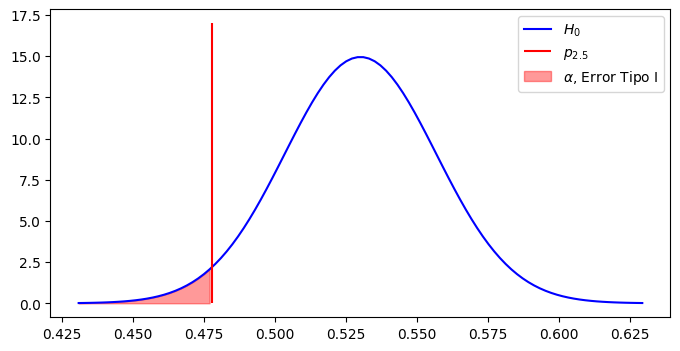

In [ ]:
# visualizando la distribución de las proprociones muestrales cuando el n=350
# y el límite crítico de Rechazo H0

# proyectar distribución H0
muestral_z = stats.norm(p, Sigma / np.sqrt(n))
x_z = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z = muestral_z.pdf(x_z) # función densidad probabilidad

plt.figure(figsize=(8, 4)) # tamaño gráfico
plt.plot(x_z, pdf_z, "b", label='$H_0$') # medias H0
plt.vlines(ymin=0, ymax=17, x=valor_proporcion_zcritico,
           colors='r',
           label='$p_{2.5}$')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z, pdf_z,
                 where = x_z <= valor_proporcion_zcritico,
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')

plt.legend()
plt.show()

In [ ]:
## 6 ) Calcular el estadístico Z de prueba.
Z = (p_muestra - p) / (Sigma /np.sqrt(n))
print(f'Z prueba: {Z:5.2f}')

## 7) Calcular el p-value y comparar con el nivel de significancia establecido.
# calcular p-value
pvalue = stats.norm.cdf(Z) * 2 # Z de prueba se encuentra en cola izquierda, multiplicar por 2 (2 colas)
print(f'p-value (significancia estadística): {pvalue:5.2f}') # 2 colas

# Otra forma usando Scipy
pvalue2 = (stats.norm(p, Sigma /np.sqrt( n )).cdf(p_muestra))*2
print(f'p-value con scipy:  {pvalue2:5.2f}')

Z prueba: -2.25
p-value (significancia estadística):  0.02
p-value con scipy:   0.02


**Concluir prueba de hipótesis Escenario 1:**

Como el $Z_{prueba}$ (-2.249) es menor al $Z_{critico}$ (-1.960), o como el _valor-p_ ($p-value = 0.024$) es menor al Nivel de signficancia "alpha" establecido en 0.05, se rechaza $H_0$. Por tanto se concluye que existe una diferencia estadísticamente significativa entre la tasa de rebote exhibida en la nueva versión y la tasa de rebote de la línea base.

Computamos nuevamente el Poder de la prueba (potencia estadística).  En caso contrario no es necesario continuar, ya que el resultado obtenido en la nueva versión no sería menor a la línea base de la organización.

In [ ]:
# Ahora tendremos las siguientes hipótesis
  # H0: p = 0.53
  # H1: p = 0.47
H1 = p_muestra

## 8) Calcular el tamaño del efecto
efecto = (p - p_muestra) # Diferencia bruta
dCohen = efecto/Sigma # d de Cohen
print(f'd Cohen: {dCohen: 4.3f}')
print(f'Tamaño del efecto: {efecto: 4.3f}')

## 9) Calcular la potencia de la prueba (1 - beta)
# Calcular Beta (error tipo II)
# Forma simple con Scipy
beta = 1 - stats.norm(H1, Sigma/np.sqrt(n)).cdf(valor_proporcion_zcritico)
print(f'Beta: {beta: 5.3f}')
potencia = 1 - beta
# Calcular Potencia estadística (1- beta)
print(f'Potencia de la prueba: {potencia: 5.3f}')

d Cohen:  0.120
Tamaño del efecto:  0.060
Beta:  0.386
Potencia de la prueba:  0.614


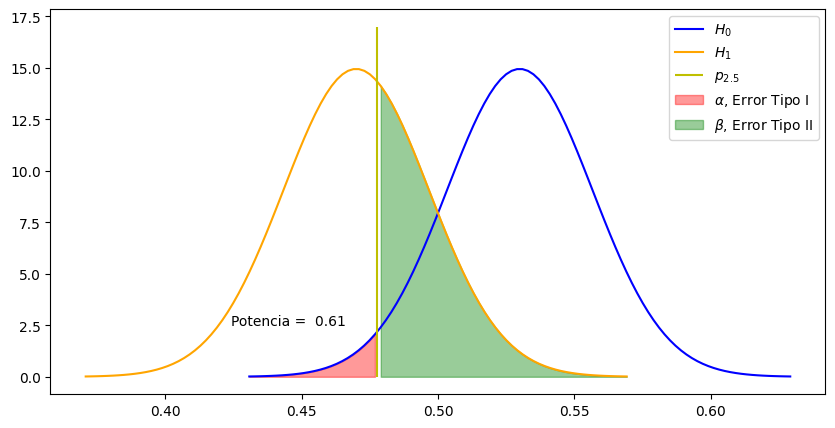

In [ ]:
# Visualizando
# Proyectar distribucion H0
h0_z = stats.norm(p, Sigma / np.sqrt(n))
x0_z = np.linspace(h0_z.ppf(0.0001), h0_z.ppf(0.9999), 100)
pdf0_z = h0_z.pdf(x0_z) # Función densidad probabilidad

# proyectar distribucion H1
h1_z = stats.norm(H1, Sigma / np.sqrt(n))
x1_z = np.linspace(h1_z.ppf(0.0001), h1_z.ppf(0.9999), 100)
pdf1_z = h1_z.pdf(x1_z) # Función densidad probabilidad

plt.figure(figsize=(10, 5)) # Tamaño gráfico
plt.plot(x0_z, pdf0_z,"b", label='$H_0$') # medias H0
plt.plot(x1_z, pdf1_z,"orange", label='$H_1$') # medias H1
plt.vlines(ymin=0, ymax=17, x=valor_proporcion_zcritico,
           colors='y',
          label='$p_{2.5}$')# valor_proporcion_zcritico
# Fill de alfa (Error tipo I)
plt.fill_between(x0_z, pdf0_z,
                 where = x0_z <= valor_proporcion_zcritico,
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x1_z, pdf1_z,
                 where = x1_z > valor_proporcion_zcritico,
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
plt.text((min(x1_z)+(valor_proporcion_zcritico-min(x1_z))/2), 2.5,
         f'Potencia = {potencia:5.2f}')
plt.legend()
plt.show()

**Conclusión final al Escanario 1 con Post-hoc bilateral**

El tratamiento aplicado "nueva versión del sitio web" en 350 usuarios aleatorios durante 1 semana, demuestra que la Tasa de Rebote de 47% exhibida es estadísticamente menor que el actual, esto con un nivel de confianza del 0.95.

También se aprecia que la diferencia (tamaño del efecto bruto) obtenida es relevante desde el punto de vista de negocio, ya que es de 600 puntos base (mayor al mínimo exigido), sin embargo al evaluar su potencia, el análisis arrojó un Poder por debajo del mínimo recomendable de 0.80, es decir, el efecto no tiene una potencia aceptable para respaldar la $H_1$ (Hipótesis alternativa).
Como cnclusión, no se puede afirmar que el tratamiento funciona.

#### 4.2. Análisis del Escenario 2

Realizamos los mismos cálculos que en el escanario 1, pero esta vez con $n=700$ y Tasa de Rebote de 49%.

In [ ]:
# Pasos
# 1) Cargamos data línea base (población)
p = 0.53
Sigma = np.sqrt(p* (1-p))

# 2) Cargar datos de la muestra
n = 700
p_muestra = 0.49 # Tasa de rebote
Sigma_muestra = np.sqrt( p_muestra * (1 - p_muestra))

# 3) Determinar el nivel de significancia de la prueba
alpha = 0.05

# 4) Definir hipótesis a contrastar (prueba unilateral - cola izquierda)
 # H0:   p = 0.53
 # H1:   p < 0.53

# regla decision (1 cola)
 # no rechazar H0 si: Z prueba >= Z crítico
 # rechazar HO si: Z prueba < Zcritico

# 5) Determinar el valor crítico de Z
Zcritico = stats.norm.ppf(alpha)# 1 cola izquierda
print(f'Z crítico: {Zcritico: 4.3f}')

# 5.1) Calcular el valor en porcentaje correspondiente al Z crítico
valor_proporcion_zcritico= stats.norm(p, Sigma/np.sqrt(n)).ppf(alpha) # buscar valor cola izquierda
print(f"Valor media para Z crítico: {valor_proporcion_zcritico: 4.3f}")

Z crítico: -1.645
Valor media para Z crítico:  0.499


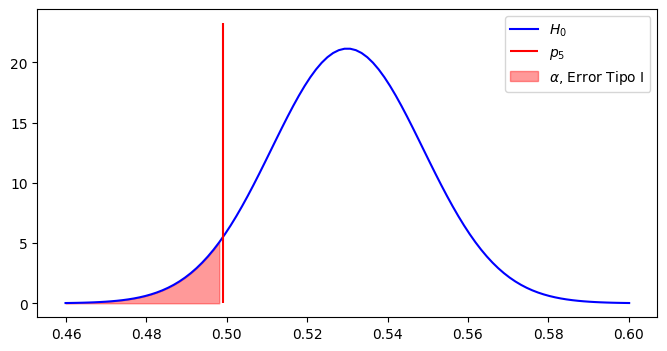

In [ ]:
# visualizando la distribución de las proprociones muestrales cuando el n=700 y el límite crítico de Rechazo H0

# proyectar distribución H0
muestral_z = stats.norm(p, Sigma / np.sqrt(n))
x_z = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z = muestral_z.pdf(x_z) # función densidad probabilidad

plt.figure(figsize=(8, 4)) # tamaño gráfico
plt.plot(x_z, pdf_z, "b", label='$H_0$') # medias H0
plt.vlines(ymin=0, ymax=max(pdf_z)*1.1,
           x=valor_proporcion_zcritico,
           colors='r', label='$p_{5}$')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z, pdf_z,
                 where = x_z <= valor_proporcion_zcritico,
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')

plt.legend()
plt.show()

Para esta prueba de Hipótesis, como el valor de proporción muestral obtenido con los 700 visitantes fue de $\text{Tasa rebote} = 49\%$, cifra menor al límite de 0.499, se puede concluir que el rebote obtenido con la nueva versión ha disminuido de forma estadísticamente significativa, esto al comparar con su línea base de 0.53.

In [ ]:
## 6 ) Calcular el estadístico Z de prueba.
Z = (p_muestra - p) / (Sigma /np.sqrt(n))
print(f'Z prueba: {Z:5.2f}')

## 7) Calcular el p-value y comparar con el nivel de significancia establecido.
# calcular p-value
pvalue = stats.norm.cdf(Z) # Z de prueba se encuentra en cola izquierda, multiplicar por 2 (2 colas)
print(f'p-value (significancia estadística): {pvalue:5.2f}') # 2 colas

# Otra forma usando Scipy
pvalue2 = (stats.norm(p, Sigma /np.sqrt(n)).cdf(p_muestra))
print(f'p-value con scipy:  {pvalue2:5.2f}')

Z prueba: -2.12
p-value (significancia estadística):  0.02
p-value con scipy:   0.02


**Concluir prueba de hipótesis Escenario 2**

Como el $Z_{prueba}$ (-2.120) es menor al $Z_{critico}$ (-1.645), o como el valor-p ($\text{p-value} = 0.016$) es menor al Nivel de signficancia "alpha" establecido en 0.05, se rechaza $H_0$. Por tanto se concluye que existe una diferencia estadísticamente significativa entre la tasa de rebote exhibida en la nueva versión y la tasa de rebote de la línea base.

In [ ]:
# Ahora tendremos las siguientes hipótesis
  # H0: p = 0.53
  # H1: p = 0.49
H1 = p_muestra

## 8) Calcular el tamaño del efecto
efecto = (p - p_muestra) # Diferencia bruta
dCohen = efecto/Sigma # d de Cohen
print(f'd Cohen: {dCohen: 4.3f}')
print(f'Tamaño del efecto: {efecto: 4.3f}')

## 9) Calcular la potencia de la prueba (1 - beta)
# Calcular Beta (error tipo II)
# Forma simple con Scipy
beta = 1 - stats.norm(H1, Sigma/np.sqrt(n)).cdf(valor_proporcion_zcritico)
print(f'Beta: {beta: 5.3f}')
potencia = 1 - beta
# Calcular Potencia estadística (1- beta)
print(f'Potencia de la prueba: {potencia: 5.3f}')

d Cohen:  0.080
Tamaño del efecto:  0.040
Beta:  0.317
Potencia de la prueba:  0.683


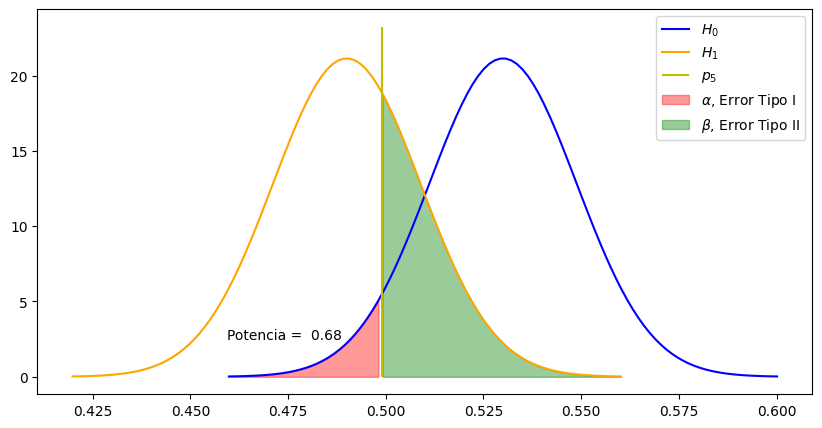

In [ ]:
# Visualizando
# Proyectar distribucion H0
h0_z = stats.norm(p, Sigma / np.sqrt(n))
x0_z = np.linspace(h0_z.ppf(0.0001), h0_z.ppf(0.9999), 100)
pdf0_z = h0_z.pdf(x0_z) # Función densidad probabilidad

# proyectar distribucion H1
h1_z = stats.norm(H1, Sigma / np.sqrt(n))
x1_z = np.linspace(h1_z.ppf(0.0001), h1_z.ppf(0.9999), 100)
pdf1_z = h1_z.pdf(x1_z) # Función densidad probabilidad

plt.figure(figsize=(10, 5)) # Tamaño gráfico
plt.plot(x0_z, pdf0_z, "b", label='$H_0$') # medias H0
plt.plot(x1_z, pdf1_z, "orange", label='$H_1$') # medias H1
plt.vlines(ymin=0, ymax=max(pdf0_z)*1.1,
           x=valor_proporcion_zcritico,
           colors='y', label='$p_5$')# valor_proporcion_zcritico
# Fill de alfa (Error tipo I)
plt.fill_between(x0_z, pdf0_z,
                 where = x0_z <= valor_proporcion_zcritico,
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x1_z, pdf1_z,
                 where = x1_z > valor_proporcion_zcritico,
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
plt.text((min(x1_z)+(valor_proporcion_zcritico-min(x1_z))/2), 2.5,
         f'Potencia = {potencia:5.2f}')
plt.legend()
plt.show()

**Conclusión final Escanario 2**

El tratamiento "nueva versión del sitio web" aplicado en 700 usuarios aleatorios durante 1 semana, demuestra que la Tasa de Rebote de 49% exhibida es estadísticamente menor que el actual, esto con un nivel de confianza del 0.95.

También se aprecia que la diferencia (tamaño del efecto bruto) obtenida es menor a lo requerido por el negocio, ya que es de sólo 400 puntos base, y, además, al evaluar la potencia, el análisis arrojó un Poder por debajo del mínimo recomendable de 0.80, es decir, el efecto obtenido por el tratamiento no solo no cumple lo esperado por el negocio, sino que además no tiene una potencia aceptable para respaldar la $H_1$ (Hipótesis alternativa).
No se puede afirmar que el tratamiento funciona.

#### 4.3. Análisis del Escenario 3

Realizamos los mismos cálculos que en el escanario 1, pero esta vez con $n=700$ y Tasa de Rebote de 47%.

In [ ]:
# Pasos
# 1) Cargamos data línea base (población)
p = 0.53
Sigma = np.sqrt(p* (1-p))

# 2) Cargar datos de la muestra
n = 700
p_muestra = 0.47 # Tasa de rebote
Sigma_muestra = np.sqrt( p_muestra * (1 - p_muestra))

# 3) Determinar el nivel de significancia de la prueba
alpha = 0.05

# 4) Definir hipótesis a contrastar (prueba unilateral - cola izquierda)
 # H0:   p = 0.53
 # H1:   p < 0.53

# regla decision (1 cola)
 # no rechazar H0 si: Z prueba >= Z crítico
 # rechazar HO si: Z prueba < Zcritico

# 5) Determinar el valor crítico de Z
Zcritico = stats.norm.ppf(alpha)# 1 cola izquierda
print(f'Z crítico: {Zcritico: 4.3f}')

# 5.1) Calcular el valor en porcentaje correspondiente al Z crítico
valor_proporcion_zcritico= stats.norm(p, Sigma/np.sqrt(n)).ppf(alpha) # buscar valor cola izquierda
print(f"Valor media para Z crítico: {valor_proporcion_zcritico: 4.3f}")

Z crítico: -1.645
Valor media para Z crítico:  0.499


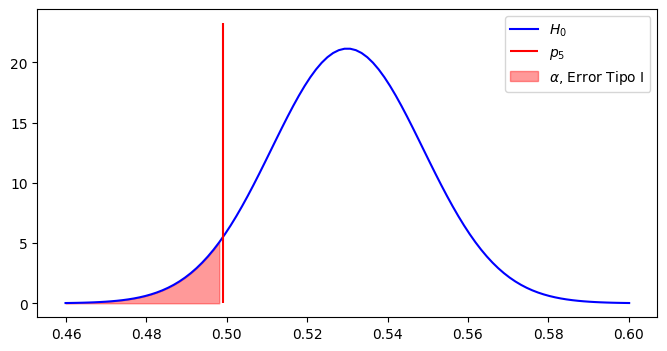

In [ ]:
# visualizando la distribución de las proprociones muestrales cuando el n=700 y el límite crítico de Rechazo H0

# proyectar distribución H0
muestral_z = stats.norm(p, Sigma / np.sqrt(n))
x_z = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z = muestral_z.pdf(x_z) # función densidad probabilidad

plt.figure(figsize=(8, 4)) # tamaño gráfico
plt.plot(x_z, pdf_z, "b", label='$H_0$') # medias H0
plt.vlines(ymin=0, ymax=max(pdf_z)*1.1,
           x=valor_proporcion_zcritico,
           colors='r', label='$p_{5}$')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z, pdf_z,
                 where = x_z <= valor_proporcion_zcritico,
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')

plt.legend()
plt.show()

Para esta prueba de Hipótesis, como el valor de proporción muestral obtenido con los 700 visitantes fue de $\text{Tasa rebote} = 47\%$, cifra menor al límite de 0.499, se puede concluir que el rebote obtenido con la nueva versión ha disminuido de forma estadísticamente significativa, esto al comparar con su línea base de 0.53.

In [ ]:
## 6 ) Calcular el estadístico Z de prueba.
Z = (p_muestra - p) / (Sigma /np.sqrt(n))
print(f'Z prueba: {Z:5.2f}')

## 7) Calcular el p-value y comparar con el nivel de significancia establecido.
# calcular p-value
pvalue = stats.norm.cdf(Z) # Z de prueba se encuentra en cola izquierda, multiplicar por 2 (2 colas)
print(f'p-value (significancia estadística): {pvalue:7.5f}') # 2 colas

# Otra forma usando Scipy
pvalue2 = (stats.norm(p, Sigma /np.sqrt(n)).cdf(p_muestra))
print(f'p-value con scipy:  {pvalue2:7.5f}')

Z prueba: -3.18
p-value (significancia estadística): 0.00073
p-value con scipy:  0.00073


**Concluir prueba de hipótesis Escenario 3:**

Como el $Z_{prueba}$ (-3.180) es menor al $Z_{critico}$ (-1.645), o como el valor-p ($\text{p-value} = 0.0007$) es menor al Nivel de signficancia "alpha" establecido en 0.05, se rechaza $H_0$. Por tanto se concluye que existe una diferencia estadísticamente significativa entre la tasa de rebote exhibida en la nueva versión y la tasa de rebote de la línea base.

In [ ]:
# Ahora tendremos las siguientes hipótesis
  # H0: p = 0.53
  # H1: p = 0.49
H1= p_muestra

## 8) Calcular el tamaño del efecto
efecto = (p - p_muestra) # Diferencia bruta
dCohen = efecto/Sigma # d de Cohen
print(f'd Cohen: {dCohen: 4.3f}')
print(f'tamaño del efecto: {efecto: 4.3f}')

## 9) Calcular la potencia de la prueba (1 - beta)
# Calcular Beta (error tipo II)
# Forma simple con Scipy
beta = 1 - stats.norm(H1, Sigma/np.sqrt(n)).cdf(valor_proporcion_zcritico)
print(f'Beta: {beta: 5.3f}')
potencia = 1 - beta
# Calcular Potencia estadística (1- beta)
print(f'Potencia de la prueba: {potencia: 5.3f}')

d Cohen:  0.120
tamaño del efecto:  0.060
Beta:  0.062
Potencia de la prueba:  0.938


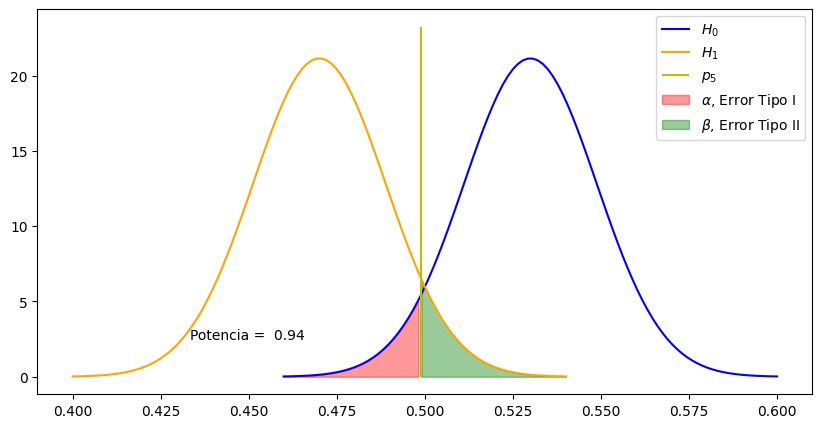

In [ ]:
# Visualizando
# Proyectar distribucion H0
h0_z = stats.norm(p, Sigma / np.sqrt(n))
x0_z = np.linspace(h0_z.ppf(0.0001), h0_z.ppf(0.9999), 100)
pdf0_z = h0_z.pdf(x0_z) # Función densidad probabilidad


# proyectar distribucion H1
h1_z = stats.norm(H1, Sigma / np.sqrt(n))
x1_z = np.linspace(h1_z.ppf(0.0001), h1_z.ppf(0.9999), 100)
pdf1_z = h1_z.pdf(x1_z) # Función densidad probabilidad

plt.figure(figsize=(10, 5)) # Tamaño gráfico
plt.plot(x0_z, pdf0_z, "b", label='$H_0$') # medias H0
plt.plot(x1_z, pdf1_z, "orange", label='$H_1$') # medias H1
plt.vlines(ymin=0, ymax=max(pdf0_z)*1.1,
           x=valor_proporcion_zcritico,
           colors='y', label='$p_5$')# valor_proporcion_zcritico
# Fill de alfa (Error tipo I)
plt.fill_between(x0_z, pdf0_z,
                 where = x0_z <= valor_proporcion_zcritico,
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x1_z, pdf1_z,
                 where = x1_z > valor_proporcion_zcritico,
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
plt.text((min(x1_z)+(valor_proporcion_zcritico-min(x1_z))/2), 2.5,
         f'Potencia = {potencia:5.2f}',
        ha='center',)
plt.legend()
plt.show()

**Conclusión final Escenario 3**

El tratamiento "nueva versión sitio web" aplicado  en 700 usuarios aleatorios durante 1 semana, demuestra que la Tasa de Rebote de 49% exhibida es estadísticamente menor que el actual, esto con un nivel de confianza del 0.95.

También se aprecia que la diferencia (tamaño del efecto bruto) obtenida es superior a lo requerido por el negocio, ya que es de 600 puntos base. Al evaluar la potencia, el análisis arrojó un Poder mayor al mínimo recomendable de 0.80, es decir, el efecto obtenido por el tratamiento cumple lo esperado por el Negocio, y además tiene una potencia aceptable (0.934) para respaldar la $H_1$ (Hipótesis alternativa).

Finalmente se concluye que la nueva versión entrega una alta seguridad de que los resultados son significativos tanto desde el punto de vista estadístico, como desde la perspectiva práctica para el negocio. Se recomienda escalar la nueva versión a todos los usuarios.

### <font color='blue'>**5. Toma acciones**</fontr>

Luego de evaluar los 3 Escenarios de ejemplo que hemos simulado, podríamos recomendar la implementación de la nueva Versión para ser utilizada por todos los usuarios de la organización, solo si se diera el Escenario 3.


### <font color='green'>Actividad 2</font>

Imagenemos que trabajamos en una compañía que desarrolla un producto de marketing digital, y nuestra promesa de valor es ayudar a los clientes a incrementar el engagement con sus clientes. Para este fin pondremos en un prestigioso cliente nuestro producto estrella.

Para evaluar el engagement nuestro prestigioso cliente mide la cantidad de minutos que pasan al día sus clientes en su plataforma, actualmente el cliente (con su actual modelo de servicio) exhibe un tiempo de actividad media de sus clientes por día igual a 200 minutos, con una desviación estandar de 35 minutos.

Esta será nuestra hipotésis nula: H0: μ = 200 min

Llevaremos a cabo un experimento para ver si nuestros producto produce un engagement mejor que el actual exhibido por nuestro cliente.

Con base en lo anterior plantearemos las siguientes hipótesis a contrastar (1 cola):

* H0 : μ = 200 min.
* H1 : μ > 200 min.

Vamos a presetear un valor alpha de 0.01 (error tipo I).

De acuerdo a conversaciones con el cliente y expertos en la materia, se ha definido que si nuestro producto mejora el engagement en al menos 15 minutos, esto será considerado como un efecto de negocio relevante. Por tanto el tamaño del efecto que utilizaremos para proceder a calcular la Potencia será de 15 minutos.

Tamaño del efecto = 15 minutos.

Desarolle un Análisis a Priori para determinar el tamaño de la muestra para garantizar una Potencia de al menos 0.80

In [ ]:
import numpy as np
from scipy import stats

# Parámetros del experimento
mu_0 = 200              # Media actual
delta = 15              # Diferencia mínima a detectar (efecto)
sigma = 35              # Desviación estándar
alpha = 0.01            # Nivel de significancia
beta = 0.20             # Probabilidad de error tipo II (1 - poder)

# Z-scores para una cola (porque solo buscamos aumento)
z_alpha = stats.norm.ppf(1 - alpha)
z_beta = stats.norm.ppf(1 - beta)

# Fórmula de tamaño de muestra para comparación de medias
n = ((z_alpha + z_beta) * sigma / delta) ** 2

print(f"Tamaño mínimo muestra (una cola): {np.ceil(n):.0f}")

Tamaño mínimo muestra (una cola): 55


# <font color='purple'> __EXPERIMENTO__: </font>
### Utilizaremos tt_solve_power Y TTestPower como un experimento adicional

In [ ]:
# Su código aquí

from statsmodels.stats.power import tt_solve_power

effect_size = 15 / 35
alpha = 0.01
power = 0.80

sample_size = tt_solve_power(effect_size=effect_size, power=power, alpha=alpha, alternative='larger')

print(f"Tamaño de muestra necesario: {round(sample_size)}")

Tamaño de muestra necesario: 57


Después de haber utilizado tt_solve_power para calcular el tamaño de la muestra de manera eficiente con una potencia específica, utilizaremos TTestPower como un experimento adicional. TTestPower será útil si necesitamos realizar más cálculos o simulaciones con variaciones en estos parámetros en el futuro.

In [ ]:
from statsmodels.stats.power import TTestPower

# Datos base
std_dev = 35
alpha = 0.01
powers = [0.8, 0.9]
effect_sizes_minutos = [10, 15, 20]  # Diferencias mínimas de interés (en minutos)

# Crear el objeto una sola vez
analysis = TTestPower()

# Iterar sobre diferentes combinaciones de potencia y tamaño del efecto
for power in powers:
    print(f"\nPotencia objetivo: {power}")
    for diff in effect_sizes_minutos:
        effect_size = diff / std_dev
        sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, alternative='larger')
        print(f"  - Efecto = {diff} min → tamaño muestral requerido = {round(sample_size)}")


Potencia objetivo: 0.8
  - Efecto = 10 min → tamaño muestral requerido = 126
  - Efecto = 15 min → tamaño muestral requerido = 57
  - Efecto = 20 min → tamaño muestral requerido = 33

Potencia objetivo: 0.9
  - Efecto = 10 min → tamaño muestral requerido = 162
  - Efecto = 15 min → tamaño muestral requerido = 74
  - Efecto = 20 min → tamaño muestral requerido = 43


Lo que hicimos fue:

* Variar la potencia deseada (0.8 y 0.9).
* Variar el tamaño del efecto (mejoras de 10, 15 y 20 minutos).

Esto nos permite comparar qué tan grande debe ser la muestra según distintos objetivos de análisis.

### <font color='purple'>Fin experimento </font>

<font color='green'>Fin actividad 2</font>

# <font color='red'>__LINK DE INTERÉS__: </font>

1. Más información sobre tt_solve_power: [LINK](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_solve_power.html )

2. Mas información sobre TTestPower: [LINK](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestPower.solve_power.html)

<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Resumen**</font>


El poder estadístico es una medida crucial en el diseño y análisis de experimentos, ya que determina la capacidad de un estudio para detectar efectos o diferencias reales en una población. En las pruebas de hipótesis de una muestra, el poder estadístico evalúa la probabilidad de rechazar correctamente una hipótesis nula falsa, es decir, cuando hay un efecto verdadero presente.


El cálculo del poder estadístico implica varios componentes clave. En primer lugar, se requiere definir la hipótesis nula y alternativa, así como el nivel de significancia (alfa), que representa el umbral para rechazar la hipótesis nula. Luego, se selecciona una medida de efecto relevante, como la diferencia de media o proporción frente a un target, la que representa la magnitud del efecto bajo la hipótesis alternativa.


El tamaño de muestra es otro factor crucial que afecta al poder estadístico. A medida que aumenta el tamaño de muestra, el poder estadístico tiende a aumentar, lo que significa una mayor probabilidad de detectar efectos reales. Además, la variabilidad de los datos también influye en el poder: una menor variabilidad conduce a un mayor poder, ya que los datos son más precisos y se pueden distinguir mejor los efectos.


* Análisis a priori: En términos de pruebas estadísticas, significa que antes de recolectar datos, decides qué pruebas vas a hacer y cómo las vas a evaluar. Esto es importante porque te ayuda a evitar tomar decisiones basadas en los resultados que obtienes después, lo que podría llevar a conclusiones incorrectas.

* Análisis post hoc: Un análisis post hoc se realiza después de recopilar los datos y llevar a cabo pruebas estadísticas. En este caso, podrías encontrarte con resultados inesperados o interesantes. Sin embargo, hacer muchas pruebas sin un plan claro antes de comenzar el experimento puede llevar a un problema llamado "p-hacking", donde seleccionas las pruebas que muestran resultados significativos y ignoras las que no lo hacen.